
# Final Project Starter

### Models to be Evaluated.

You will train and evaluate different models

- Logistic Regression: Serves as a baseline for performance comparison.
- Random Forest: An ensemble method known for its robustness and ability to handle complex data structures.
- Gradient Boosting Machine (GBM) OR XGBoost: Advanced ensemble techniques known for their predictive power.
- Neural Network: An approximation method known for it’s ability to identify non-linear relationships.
- StackingClassifier or AutoGluon Weighted Ensemble.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -- model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score

# -- pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Import Data



In [3]:
loan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 3- Predict Loan Default/loan_train.csv')
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  1077501.0  1296599.0     5000.0       5000.0           4975.0  36 months   
1  1077430.0  1314167.0     2500.0       2500.0           2500.0  60 months   
2  1076863.0  1277178.0    10000.0      10000.0          10000.0  36 months   
3  1069639.0  1304742.0     7000.0       7000.0           7000.0  60 months   
4  1072053.0  1288686.0     3000.0       3000.0           3000.0  36 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN           Sep-2016   
1   15.27%        59.83     C        C4  ...          NaN           Sep-2016   
2   13.49%       339.31     C        C1  ...          NaN           Apr-2016   
3   15.96%       170.08     C        C5  ...          NaN           Sep-2016   
4   18.64%       109.43     E        E1  ...          NaN           Dec-2014   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0          1.0       INDIVIDUAL            0.0   
1                        0.0          1.0       INDIVIDUAL            0.0   
2                        0.0          1.0       INDIVIDUAL            0.0   
3                        0.0          1.0       INDIVIDUAL            0.0   
4                        0.0          1.0       INDIVIDUAL            0.0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0         0.0                  0.0       0.0  
1                      0.0         0.0                  0.0       0.0  
2                      0.0         0.0                  0.0       0.0  
3                      0.0         0.0                  0.0       0.0  
4                      0.0         0.0                  0.0       0.0  

[5 rows x 52 columns]

In [4]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#Preprocessing/Feature Engineering

In [5]:
loan['loan_status']

0        current
1        default
2        current
3        current
4        current
          ...   
29772    current
29773    current
29774    current
29775    current
29776    current
Name: loan_status, Length: 29777, dtype: object

Percentage of Good vs Default accounts

In [6]:
loan['loan_status'].value_counts(normalize=True)

current    0.849649
default    0.150351
Name: loan_status, dtype: float64

In [7]:
target = 'loan_status'

Change Loan_status (target) to binary

In [8]:
loan[target] = loan[target].map({'current': 0, 'default': 1})
loan[target].value_counts()

0    25300
1     4477
Name: loan_status, dtype: int64

Missing Values

In [9]:
loan.isna().sum()

id                                3
member_id                         3
loan_amnt                         3
funded_amnt                       3
funded_amnt_inv                   3
term                              3
int_rate                          3
installment                       3
grade                             3
sub_grade                         3
emp_title                      1822
emp_length                      762
home_ownership                    3
annual_inc                        4
verification_status               3
issue_d                           3
loan_status                       0
pymnt_plan                        3
url                               3
desc                           9433
purpose                           3
title                            14
zip_code                          3
addr_state                        3
dti                               3
delinq_2yrs                      23
earliest_cr_line                 23
fico_range_low              

Change term, interest rate, employment length, and revol_util to int/float

Change Issue_d and address state to obj

Change Term to float

In [10]:
loan['term']=loan['term'].str.replace('months','').astype('float')
loan['term']=loan['term'].fillna(loan['term'].median())
loan['term']

0        36.0
1        60.0
2        36.0
3        60.0
4        36.0
         ... 
29772    36.0
29773    36.0
29774    36.0
29775    36.0
29776    36.0
Name: term, Length: 29777, dtype: float64

Change interest rate to float

In [11]:
loan['int_rate']=loan['int_rate'].str.replace('%','').astype('float')
loan['int_rate']=loan['int_rate'].fillna(loan['int_rate'].median())
loan['int_rate']=loan['int_rate']/100
loan['int_rate']

0        0.1065
1        0.1527
2        0.1349
3        0.1596
4        0.1864
          ...  
29772    0.0964
29773    0.0933
29774    0.0838
29775    0.1199
29776    0.1199
Name: int_rate, Length: 29777, dtype: float64

Change Employment Length to int

In [12]:
loan['emp_length']=loan['emp_length'].str.replace('years','').str.replace('year','').str.replace('<','').str.replace('+','').astype('float')
loan['emp_length']=loan['emp_length'].fillna(loan['emp_length'].median())
loan['emp_length']

0        10.0
1         1.0
2        10.0
3         8.0
4         9.0
         ... 
29772     1.0
29773     1.0
29774     1.0
29775     4.0
29776     4.0
Name: emp_length, Length: 29777, dtype: float64

Change revol_util to float

In [13]:
loan['revol_util']=loan['revol_util'].str.replace('%','').astype('float')
loan['revol_util']=loan['revol_util'].fillna(loan['revol_util'].median())
loan['revol_util']=loan['revol_util']/100
loan['revol_util']

0        0.837
1        0.094
2        0.210
3        0.856
4        0.875
         ...  
29772    0.495
29773    0.495
29774    0.495
29775    0.495
29776    0.495
Name: revol_util, Length: 29777, dtype: float64

Change issue_d to date

In [14]:
#loan['issue_d'] = pd.to_datetime(loan['issue_d'], format="%b-%Y")
#loan['issue_d']

Change address state to object

In [15]:
loan['addr_state']=loan['addr_state'].fillna('missing')
loan['addr_state']

0             AZ
1             GA
2             CA
3             NC
4             CA
          ...   
29772         MA
29773         NY
29774         NY
29775    missing
29776    missing
Name: addr_state, Length: 29777, dtype: object

In [16]:
loan['loan_amnt']

0         5000.0
1         2500.0
2        10000.0
3         7000.0
4         3000.0
          ...   
29772     1000.0
29773     2525.0
29774     6500.0
29775        NaN
29776        NaN
Name: loan_amnt, Length: 29777, dtype: float64

Find Numeric and Categorical Features

In [17]:
numeric_features = loan.select_dtypes(include=['int64', 'float64']).columns
#print(numeric_features)
numeric_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee',
       'last_pymnt_amnt', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens','int_rate','emp_length']
print(numeric_features)

categorical_features = loan.select_dtypes(include=['object']).columns
#print(categorical_features)
categorical_features = ['grade', 'sub_grade','home_ownership', 'verification_status','issue_d','addr_state','term']
print(categorical_features)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_amnt', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'int_rate', 'emp_length']
['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'addr_state', 'term']


#Prepare Pipeline

In [18]:
# create transformers

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# combine
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#Exploratory Analysis

Distribution of Numerical Columns

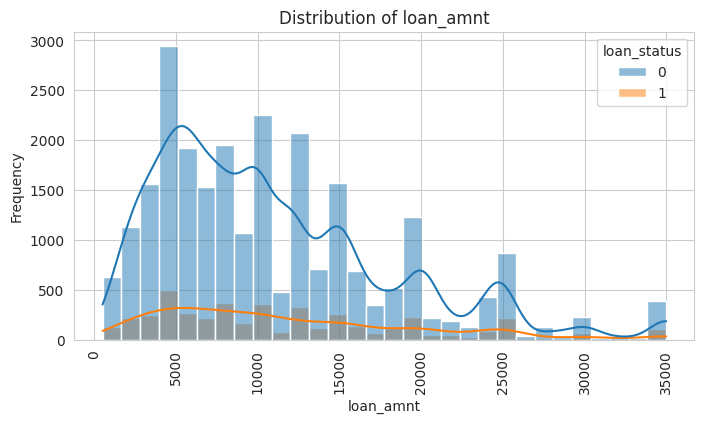

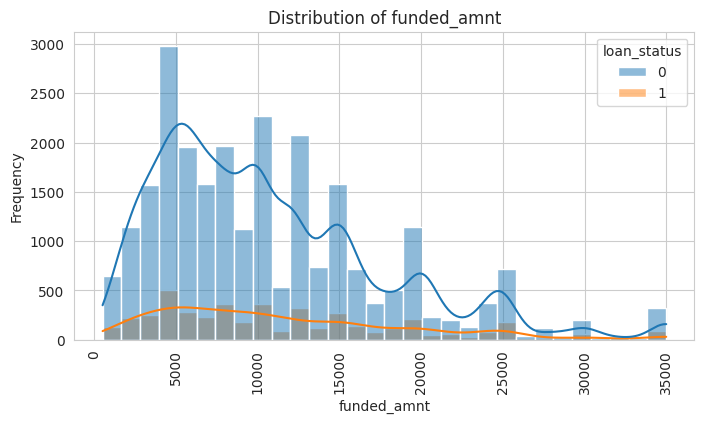

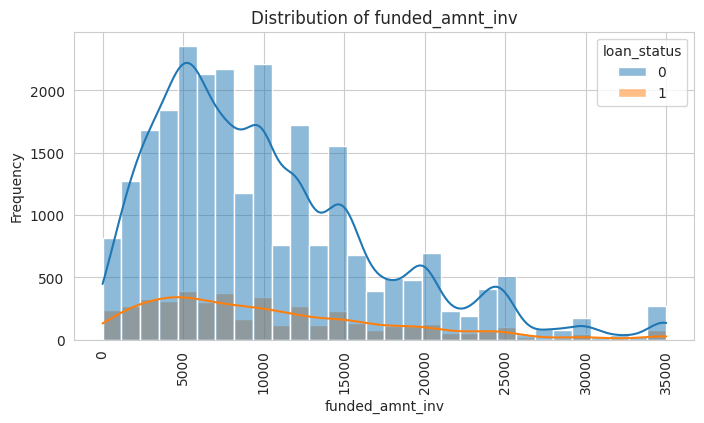

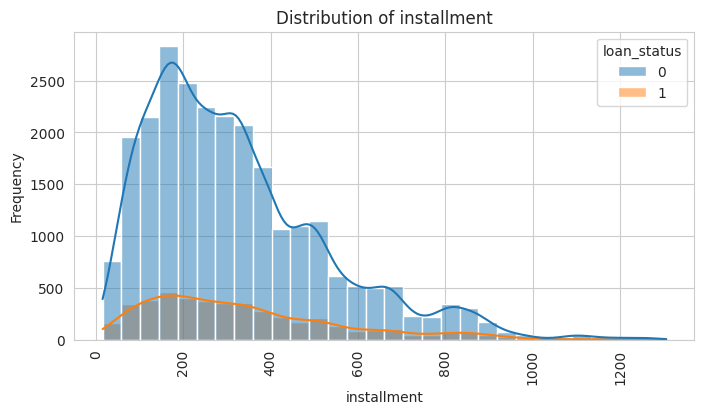

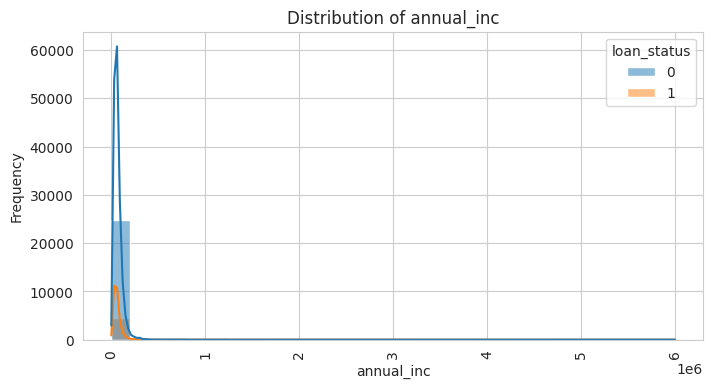

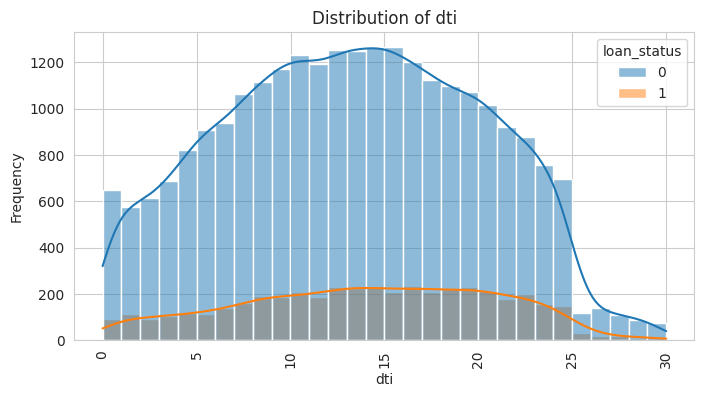

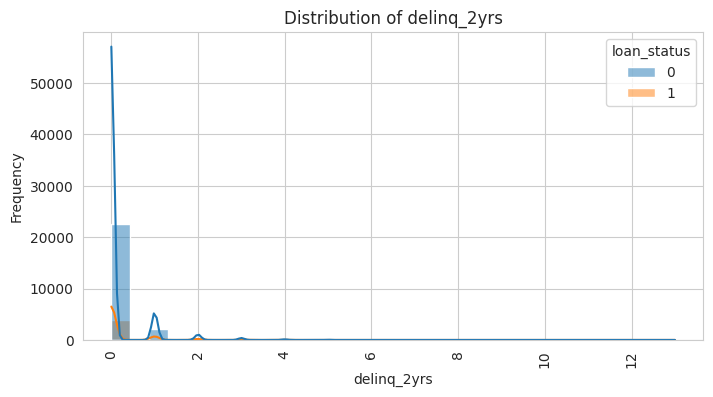

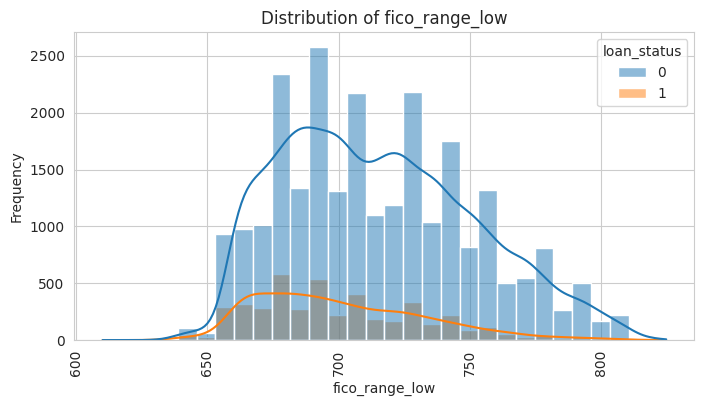

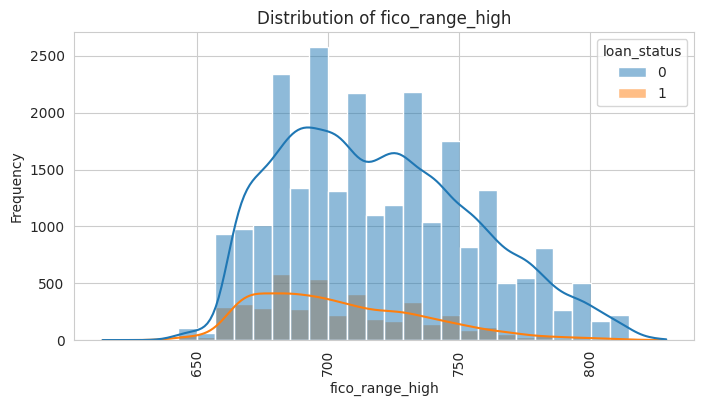

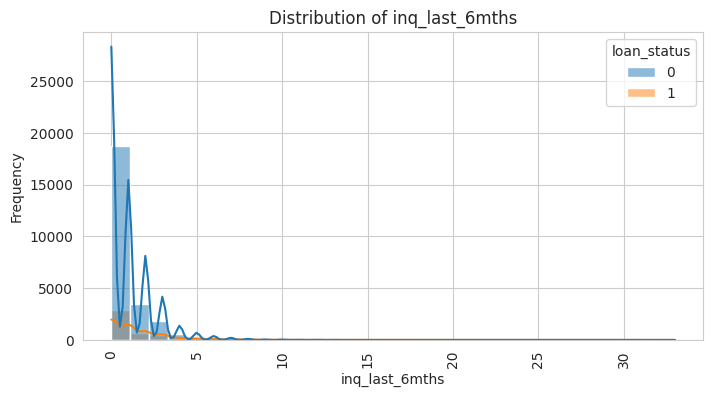

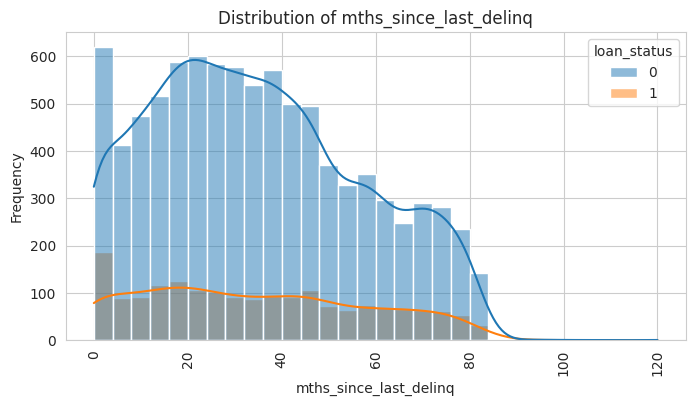

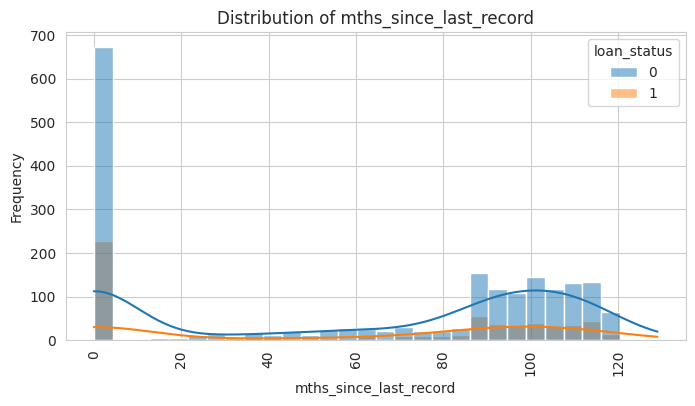

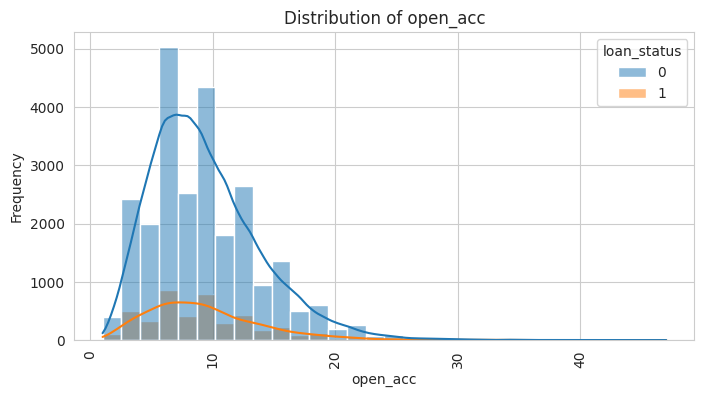

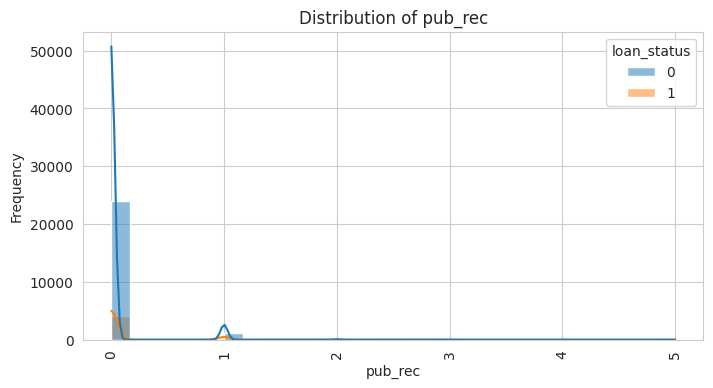

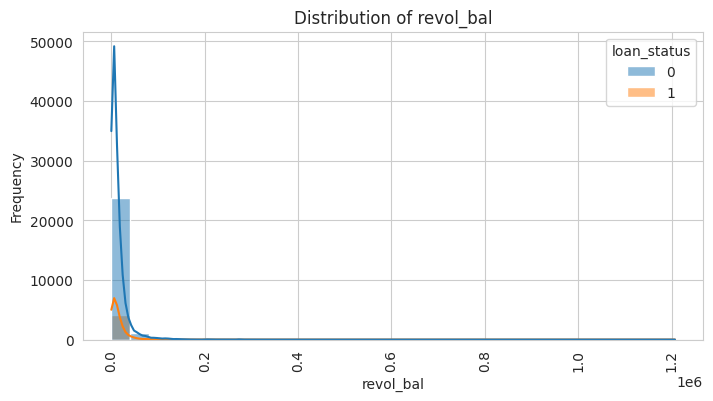

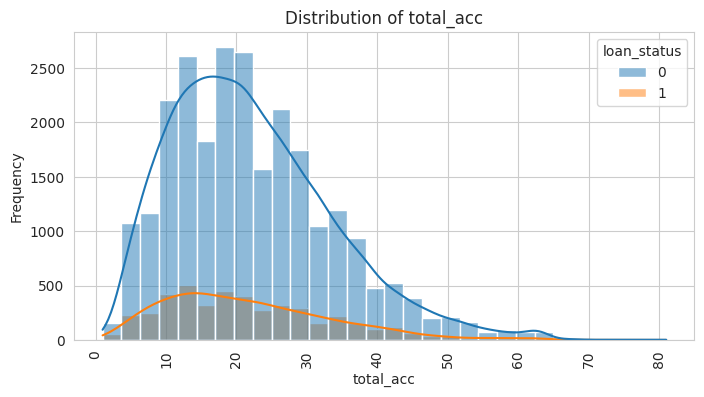

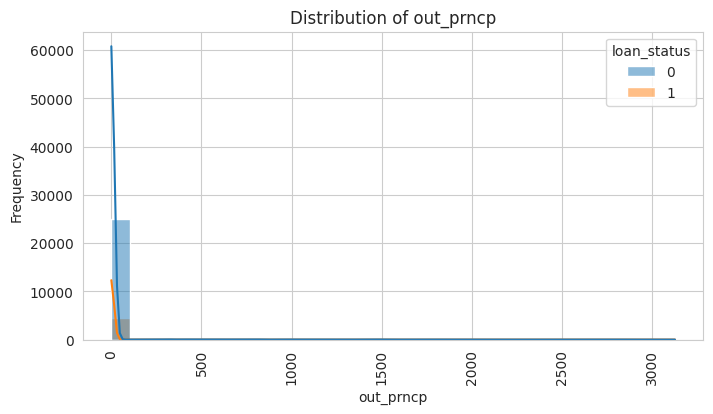

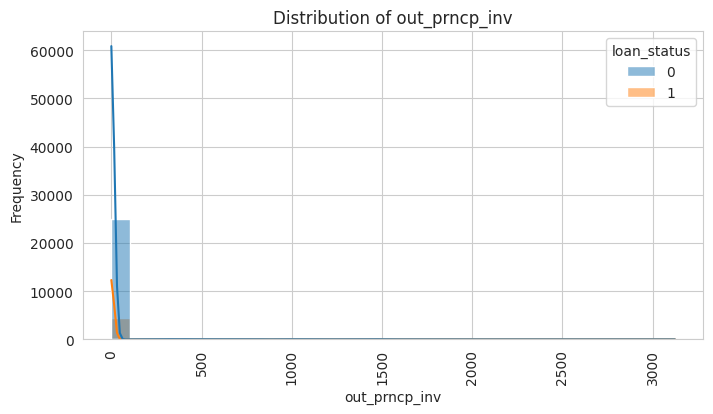

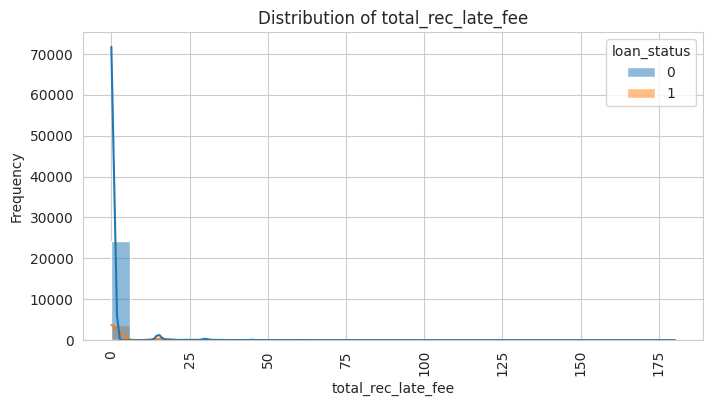

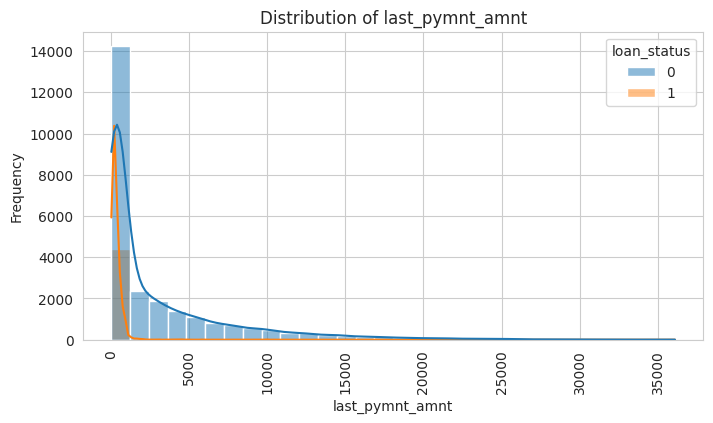

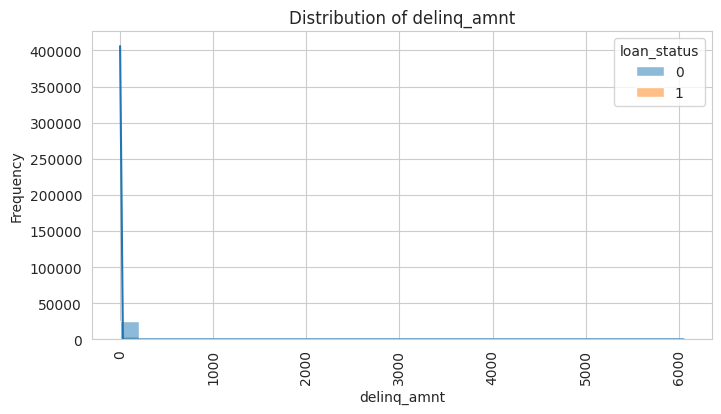

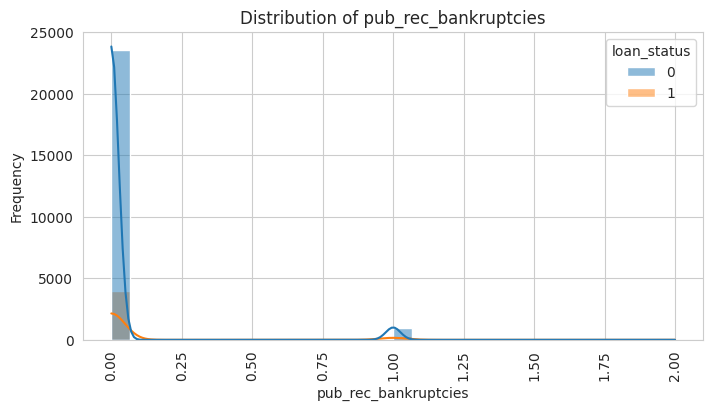

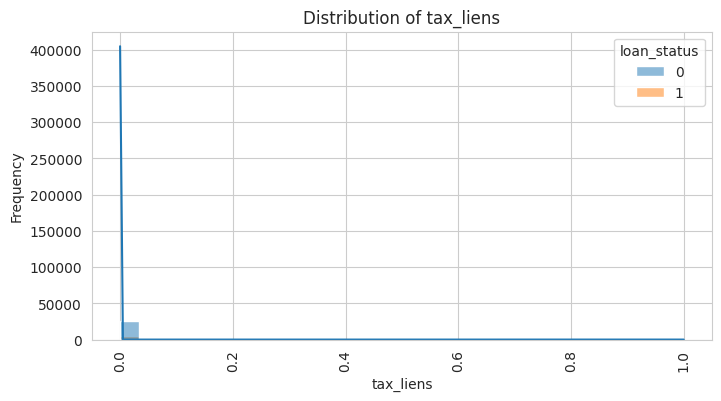

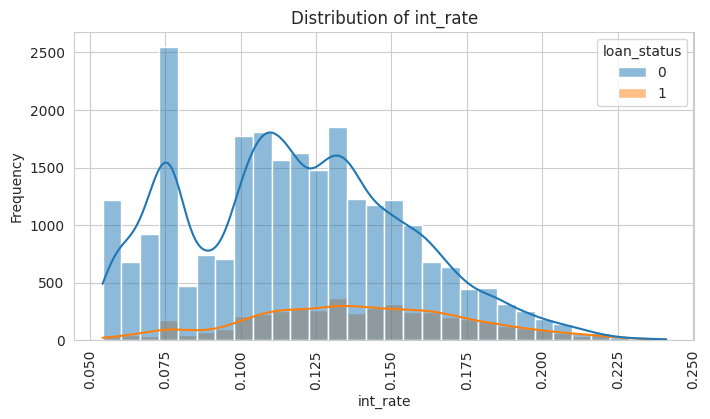

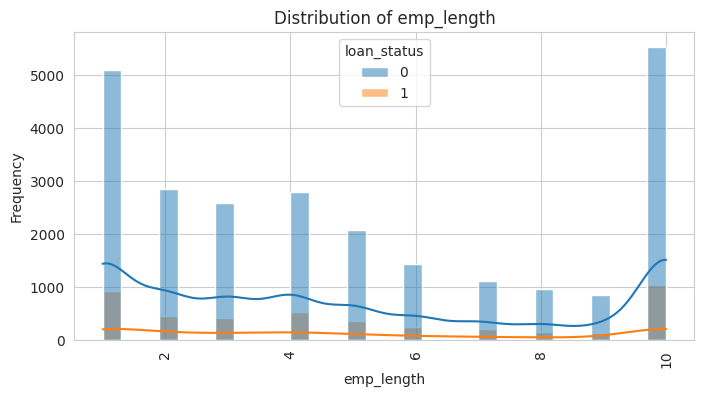

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data= loan, x=col, hue=target, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

Insights:
- 5000 is usually the most fraudulent account loan amount
- 4000 is the most commonly invested amount for the fraudulent loans
- Debt to Income is pretty consistent for fraudulent accounts between about 13% to 21%, significantly drops off before about 5% and after 25%

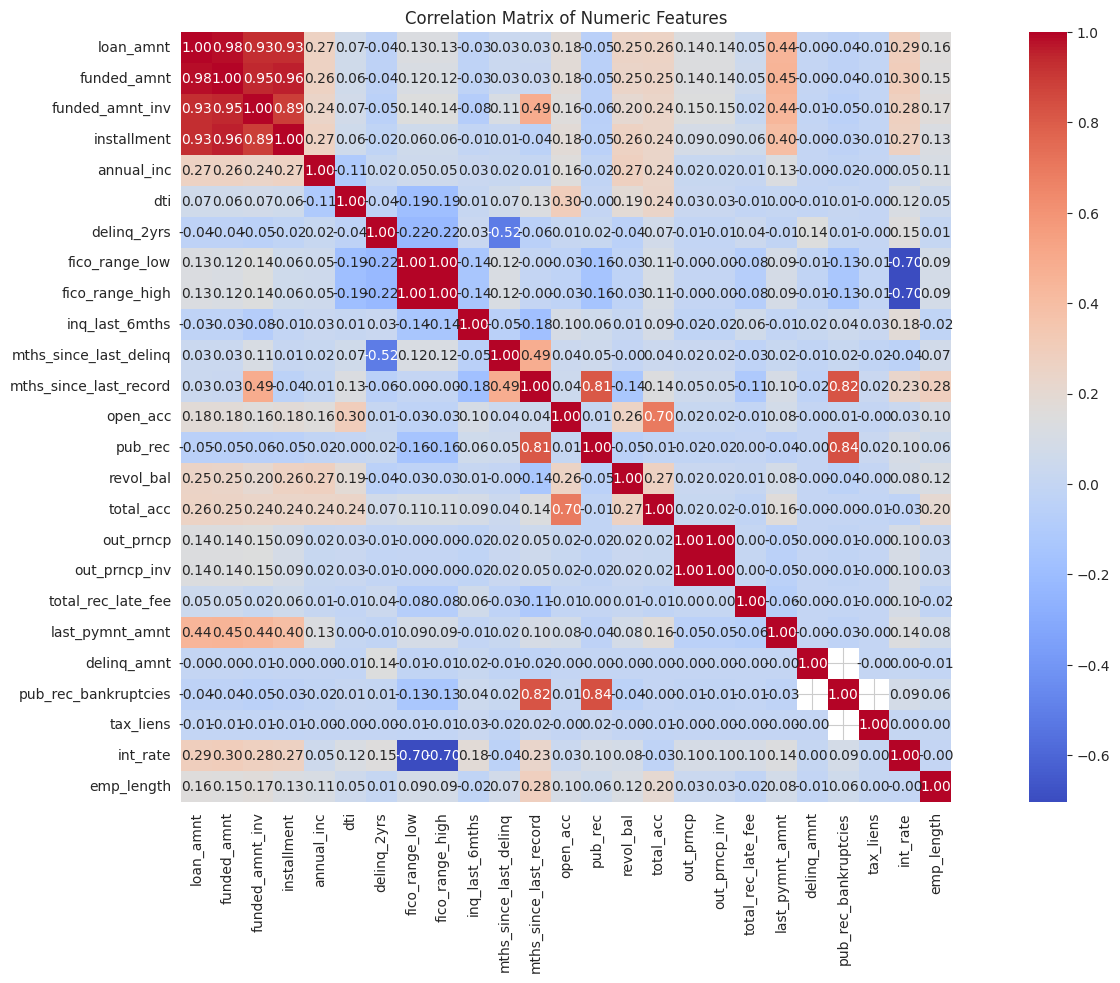

In [20]:
# Compute the correlation matrix
corr = loan[numeric_features].corr()

# Generate a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Insights:
- Months since last record and number of derogatory public records are highly correlated, also bankrupcies are highly correlated with months since last record

Distributions of Categorical Columns

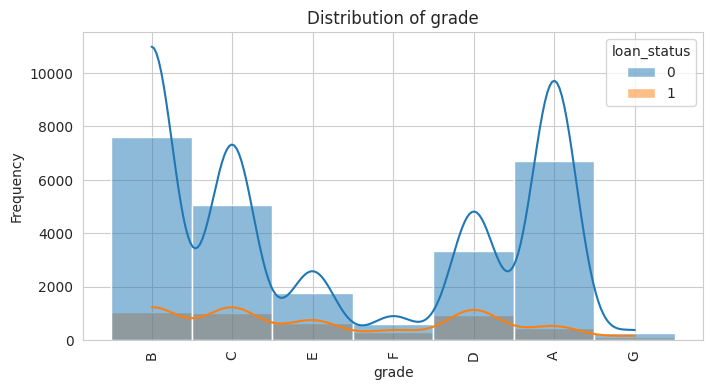

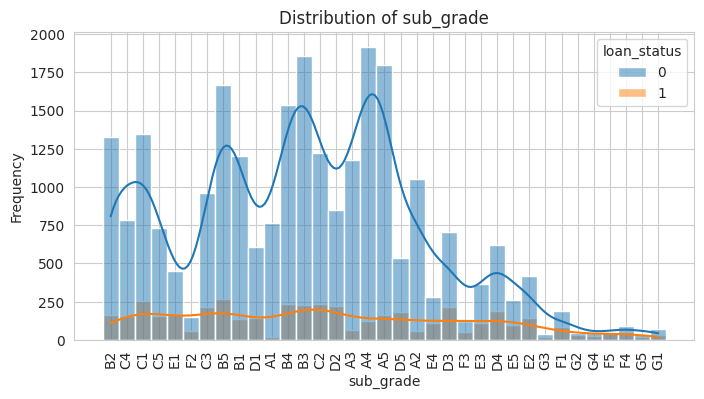

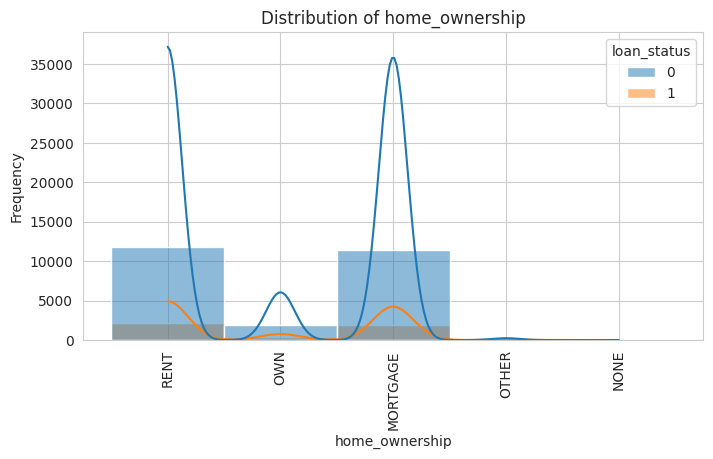

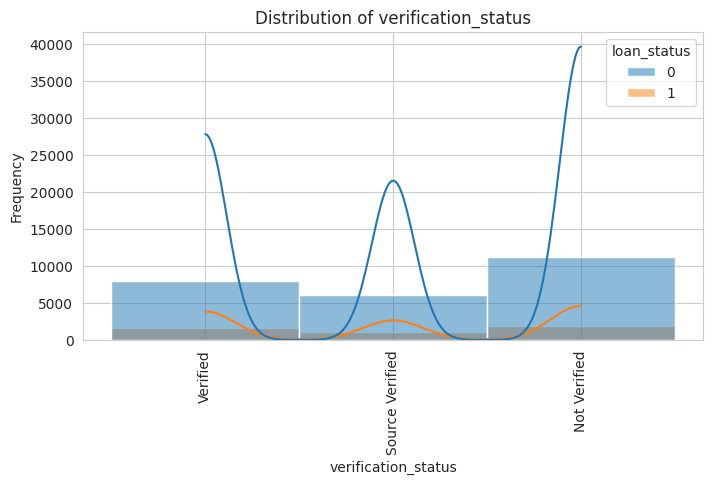

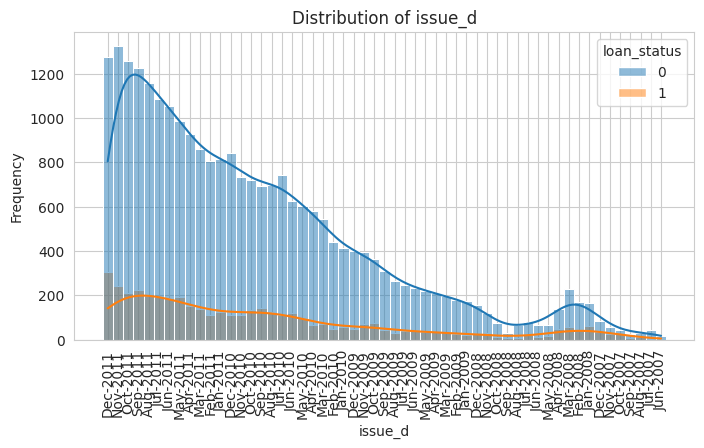

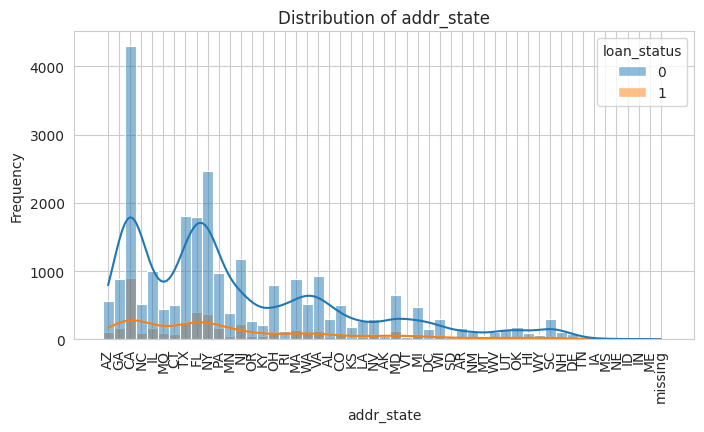

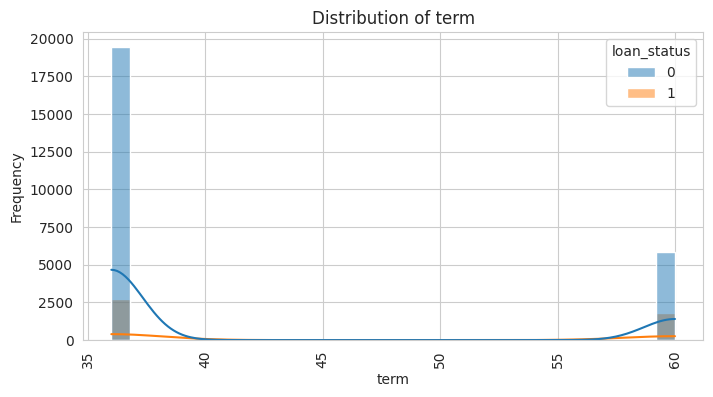

In [21]:
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data= loan, x=col, hue=target, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

Insights:
- C and D grades are the most fraudulent
- C1&2 and B3&5 are the most fraudulent subgrades
- Verification status does not seem to play a big role in fraudulent accounts

# Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(loan[numeric_features + categorical_features], loan[target], test_size=0.2, random_state=42)


#Logistic Regression

In [23]:
# Define the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=0, max_iter=300))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
lr_predictions = lr_pipeline.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"  AUC: {roc_auc_score(y_test, lr_predictions):.4f}")
print(f"  Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"  Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f"  F1: {f1_score(y_test, lr_predictions):.4f}")

Logistic Regression Accuracy: 0.8709
  AUC: 0.6297
  Precision: 0.6421
  Recall: 0.2872
  F1: 0.3969


In [24]:
feature_names = preprocessor.get_feature_names_out()
feature_importance = lr_pipeline.named_steps['classifier'].coef_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

feature  importance
0         num__funded_amnt    1.266988
1    cat__issue_d_Oct-2007    1.005513
2            num__int_rate    0.873775
3       cat__addr_state_NE    0.736776
4       cat__addr_state_AK    0.717590
..                     ...         ...
183  cat__issue_d_Jan-2009   -0.735262
184     cat__addr_state_DC   -0.804703
185   num__funded_amnt_inv   -0.826039
186     cat__addr_state_WY   -1.046875
187   num__last_pymnt_amnt   -8.120563

[188 rows x 2 columns]

In [25]:
# Logistic Regression coefficients as feature importance
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

# Aligning feature names and coefficients
lr_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_coefficients})
lr_feature_importance_df = lr_feature_importance_df.sort_values(by='Coefficient', ascending=False)
lr_feature_importance_df.head(10)

Feature  Coefficient
1         num__funded_amnt     1.266988
124  cat__issue_d_Oct-2007     1.005513
23           num__int_rate     0.873775
163     cat__addr_state_NE     0.736776
135     cat__addr_state_AK     0.717590
92   cat__issue_d_Dec-2011     0.654993
25            cat__grade_A     0.647216
150     cat__addr_state_IN     0.592459
175     cat__addr_state_SD     0.511843
167     cat__addr_state_NV     0.507659

Plot ROC and PR Curves

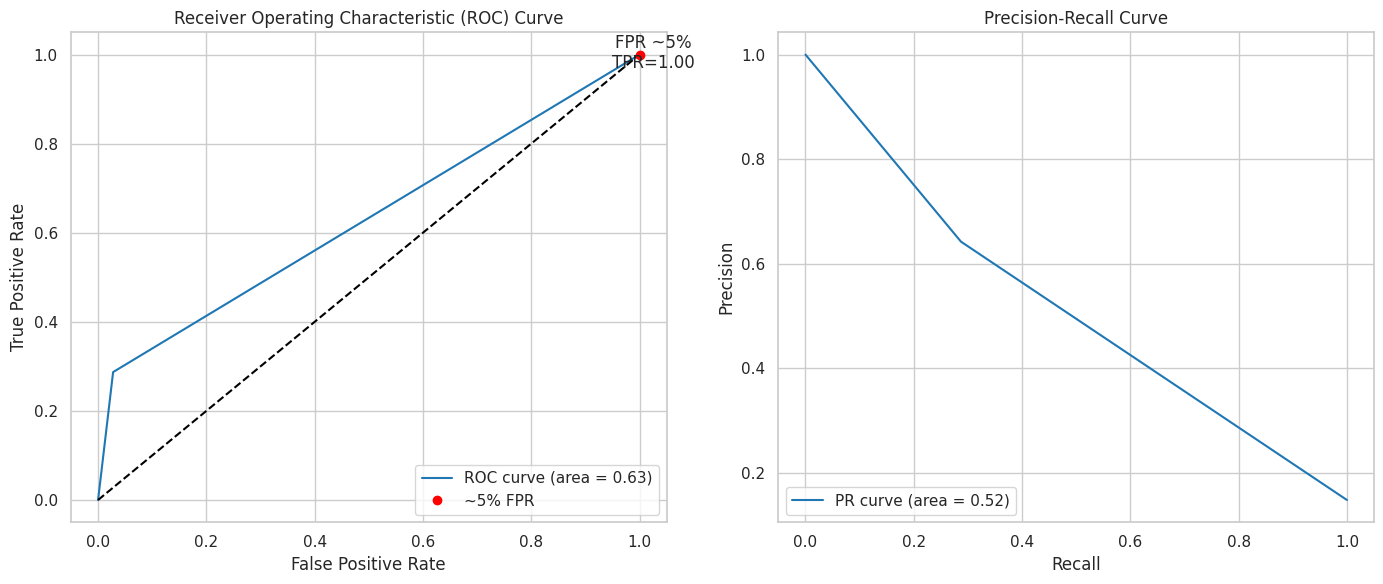

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

lr_predictions_proba = lr_pipeline.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, lr_predictions)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, lr_predictions)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

#Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=50, n_jobs = -1, random_state=0))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
rf_predictions = rf_pipeline.predict(X_test)
rf_predictions_proba = rf_pipeline.predict_proba(X_test)[:,1]
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"  AUC: {roc_auc_score(y_test, rf_predictions):.4f}")
print(f"  Precision: {precision_score(y_test, rf_predictions):.4f}")
print(f"  Recall: {recall_score(y_test, rf_predictions):.4f}")
print(f"  F1: {f1_score(y_test, rf_predictions):.4f}")


Random Forest Accuracy: 0.8647
  AUC: 0.5721
  Precision: 0.6866
  Recall: 0.1566
  F1: 0.2551


In [28]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [20, 30, 50],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [ 5, 10],
    #'classifier__min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters:
  classifier__max_depth: None
  classifier__min_samples_split: 10
  classifier__n_estimators: 50


In [29]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=50,
                                                                    min_samples_split=10,
                                                                    max_depth = None,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_re...
                                                   'emp_length']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d', 'addr_state',
                                                   'term'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=10, n_estimators=50,
                                        n_jobs=-1, random_state=42))])

In [30]:
# compare rf_pipeline to rf_pipeline_hpo performance
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]
y_pred_rf_hpo = rf_pipeline_hpo.predict(X_test)
y_pred_proba_rf_hpo = rf_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


# Evaluation Metrics
#print("Random Forest Model Evaluation:")
#print(f"  Accuracy: {accuracy_rf:.4f}")
#print(f"  AUC: {auc_rf:.4f}")
#print(f"  Precision: {precision_rf:.4f}")
#print(f"  Recall: {recall_rf:.4f}")
#print(f"  F1: {f1_score(y_test, y_pred_rf):.4f}")
#print("\n -------- \n")
print("Random Forest Model Evaluation with HPO:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_rf_hpo):.4f}")


Random Forest Model Evaluation with HPO:
  Accuracy: 0.8625
  AUC: 0.8549
  Precision: 0.6520
  Recall: 0.1510
  F1: 0.2452


#**False Positive Rate for RF Question - 2%- Threshold 0.464092  5%-0.365205**

In [31]:
from sklearn.metrics import roc_curve
import numpy as np
# Predict probabilities for the positive class
y_scores = rf_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")


Target FPR: 0.01, Expected TPR: 0.1260, Threshold: 0.5284
Target FPR: 0.02, Expected TPR: 0.2089, Threshold: 0.4641
Target FPR: 0.03, Expected TPR: 0.2928, Threshold: 0.4212
Target FPR: 0.04, Expected TPR: 0.3405, Threshold: 0.3908
Target FPR: 0.05, Expected TPR: 0.3939, Threshold: 0.3652
Target FPR: 0.06, Expected TPR: 0.4291, Threshold: 0.3474
Target FPR: 0.07, Expected TPR: 0.4631, Threshold: 0.3320
Target FPR: 0.08, Expected TPR: 0.4938, Threshold: 0.3151
Target FPR: 0.09, Expected TPR: 0.5233, Threshold: 0.3031
Target FPR: 0.10, Expected TPR: 0.5551, Threshold: 0.2895


In [32]:
import pandas as pd

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df


Target FPR (%)  Expected TPR  Threshold
0             1.0      0.125993   0.528399
1             2.0      0.208854   0.464092
2             3.0      0.292849   0.421195
3             4.0      0.340522   0.390809
4             5.0      0.393871   0.365205
5             6.0      0.429058   0.347371
6             7.0      0.463110   0.331984
7             8.0      0.493757   0.315133
8             9.0      0.523269   0.303089
9            10.0      0.555051   0.289518

In [33]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

rf_importances = rf_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df.head(10)


Feature  Importance
19     last_pymnt_amnt    0.187631
23            int_rate    0.046261
18  total_rec_late_fee    0.045895
4           annual_inc    0.040753
14           revol_bal    0.037769
3          installment    0.037259
2      funded_amnt_inv    0.036247
5                  dti    0.034447
1          funded_amnt    0.029179
0            loan_amnt    0.028509

Plot ROC and PR Curves

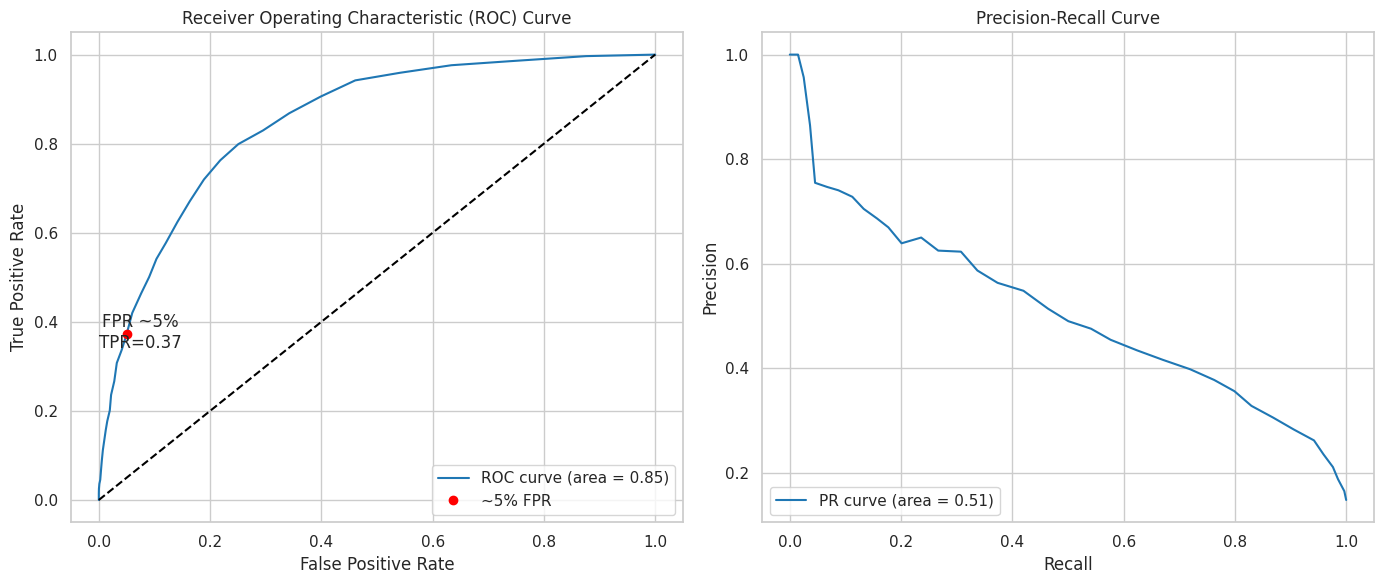

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_rf)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

#GBM

In [35]:
from sklearn.ensemble import GradientBoostingClassifier #- GBM classfier
# Define the GBMClassifier - here we are not using the pipeline just model

gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(
                                                                        learning_rate=0.1, n_estimators=100,
                                                                    ))])

# Train the GBMClassifier model
gbm_pipeline.fit(X_train,y_train)


y_pred_gbm  = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\n -------- ")
print("GBM Baseline:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_gbm):.4f}")


 -------- 
GBM Baseline:
  Accuracy: 0.8806
  AUC: 0.8923
  Precision: 0.7083
  Recall: 0.3280
  F1: 0.4484


#Optimize GBM

In [36]:
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [100,200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gbm_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters:
  classifier__learning_rate: 0.2
  classifier__n_estimators: 200


In [37]:
# Initialize the pipeline with the preprocessor and a GBM classifier
gbm_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(n_estimators=200,
                                                                    learning_rate=0.2,
                                                                    ))])
# Train the pipeline
gbm_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_re...
                                                   'tax_liens', 'int_rate',
                                                   'emp_length']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d', 'addr_state',
                                                   'term'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=200))])

In [38]:
# compare gbm_pipeline to gbm_pipeline_hpo performance

y_pred_gbm  = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

y_pred_gbm_hpo  = gbm_pipeline_hpo.predict(X_test)
y_pred_proba_gbm_hpo = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics

#print("\n -------- ")
#print("GBM Baseline:")
#print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm):.3f}")
#print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm):.3f}")
#print(f"  Precision: {precision_score(y_test, y_pred_gbm):.3f}")
#print(f"  Recall: {recall_score(y_test, y_pred_gbm):.4f}")
#print(f"  F1: {f1_score(y_test, y_pred_gbm):.4f}")

print("\n -------- ")
print("GBM Optimized:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_gbm_hpo):.4f}")


 -------- 
GBM Optimized:
  Accuracy: 0.8840
  AUC: 0.8992
  Precision: 0.7083
  Recall: 0.3666
  F1: 0.4832


#**False Positive Rate for GBM Question - 2%- 0.543357  5%- 0.389132**

In [39]:
from sklearn.metrics import roc_curve
import numpy as np
# Predict probabilities for the positive class
y_scores = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")


Target FPR: 0.01, Expected TPR: 0.2588, Threshold: 0.6419
Target FPR: 0.02, Expected TPR: 0.3292, Threshold: 0.5444
Target FPR: 0.03, Expected TPR: 0.3814, Threshold: 0.4853
Target FPR: 0.04, Expected TPR: 0.4393, Threshold: 0.4386
Target FPR: 0.05, Expected TPR: 0.4960, Threshold: 0.3891
Target FPR: 0.06, Expected TPR: 0.5255, Threshold: 0.3622
Target FPR: 0.07, Expected TPR: 0.5755, Threshold: 0.3260
Target FPR: 0.08, Expected TPR: 0.5959, Threshold: 0.3019
Target FPR: 0.09, Expected TPR: 0.6288, Threshold: 0.2820
Target FPR: 0.10, Expected TPR: 0.6561, Threshold: 0.2626


In [40]:
import pandas as pd

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df


Target FPR (%)  Expected TPR  Threshold
0             1.0      0.258797   0.641912
1             2.0      0.329171   0.544357
2             3.0      0.381385   0.485261
3             4.0      0.439274   0.438569
4             5.0      0.496027   0.389132
5             6.0      0.525539   0.362178
6             7.0      0.575482   0.326002
7             8.0      0.595914   0.301903
8             9.0      0.628831   0.282036
9            10.0      0.656073   0.262559

In [41]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

gbm_importances = gbm_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
gbm_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbm_importances})
gbm_feature_importance_df = gbm_feature_importance_df.sort_values(by='Importance', ascending=False)
gbm_feature_importance_df.head(10)

Feature  Importance
19      last_pymnt_amnt    0.408359
18   total_rec_late_fee    0.153558
23             int_rate    0.107309
187           term_60.0    0.050490
3           installment    0.037000
17        out_prncp_inv    0.027973
2       funded_amnt_inv    0.026659
186           term_36.0    0.022851
4            annual_inc    0.018435
0             loan_amnt    0.015295

Plot ROC and PR Curves

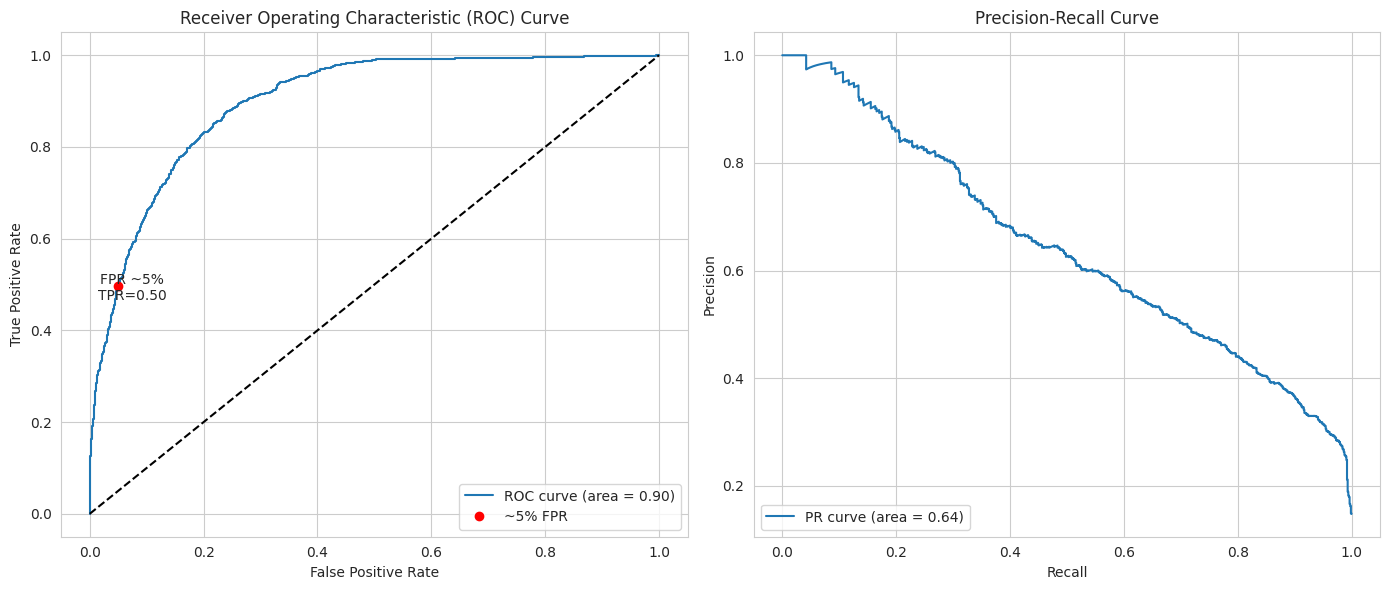

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_gbm_hpo)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_gbm_hpo)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

#Neural Network

In [43]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, roc_auc_score, average_precision_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [44]:
categorical_features

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'addr_state',
 'term']

In [45]:
#from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

#X = loan.drop('target', axis=1)
#y = loan['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#numeric_features = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','delinq_2yrs',
# 'fico_range_low','fico_range_high','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec',
# 'revol_bal','total_acc','out_prncp','out_prncp_inv','total_rec_late_fee','last_pymnt_amnt','delinq_amnt','pub_rec_bankruptcies','tax_liens',
# 'int_rate','emp_length']
#categorical_features = ['grade','sub_grade','home_ownership','verification_status','issue_d','addr_state','term']

# Create preprocessing pipelines
#numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),
#    ('scaler', StandardScaler())
#])

#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Combine preprocessing steps
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numeric_features),
#        ('cat', categorical_transformer, categorical_features)
#    ])

# Create the MLPRegressor pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])


# Train the model
mlp_pipeline.fit(X_train, y_train)



# Predict and evaluate the model
y_pred_nn = mlp_pipeline.predict(X_test)
y_pred_proba_nn = mlp_pipeline.predict_proba(X_test)[:, 1]
mse = mean_squared_error(y_test, y_pred_nn)
r2 = r2_score(y_test, y_pred_nn)

print("Neural Network:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_nn):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_nn):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_nn):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_nn):.4f}")

Neural Network:
  Accuracy: 0.8361
  AUC: 0.8124
  Precision: 0.4396
  Recall: 0.3927
  F1: 0.4149


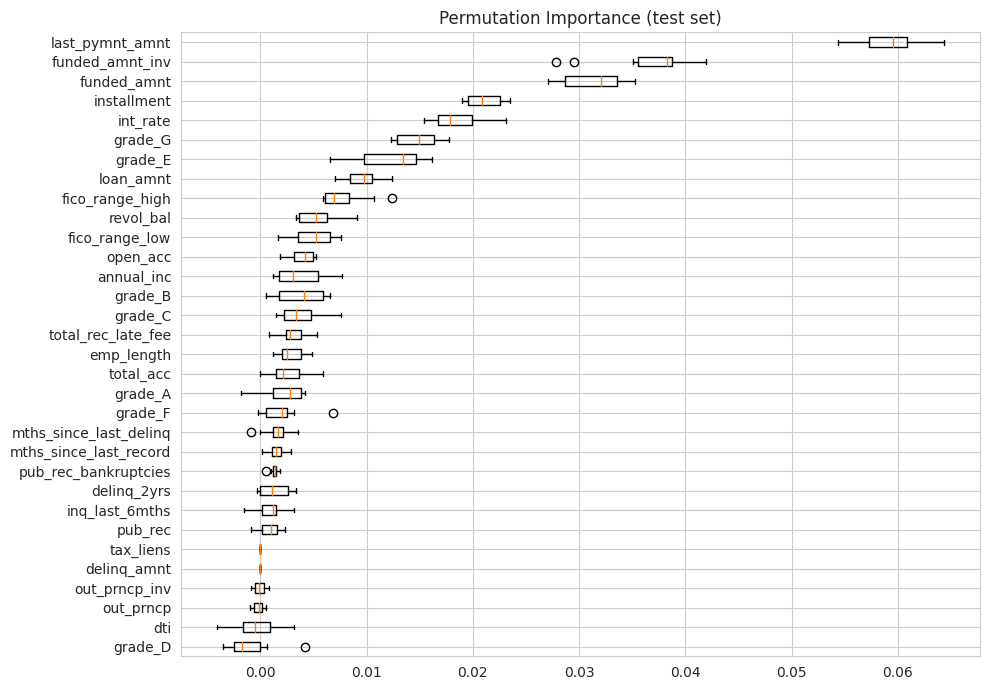

In [46]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Compute permutation importance
result = permutation_importance(mlp_pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

# Function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    # Loop through each transformer in the column transformer
    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(pipe, 'get_feature_names_out'):
            # If the transformer has a get_feature_names_out method, use it
            if hasattr(pipe, 'categories_'):
                feature_names = pipe.get_feature_names_out(features)
            else:
                feature_names = pipe.get_feature_names_out()
        else:
            # Otherwise, use the provided feature names
            feature_names = features
        output_features.extend(feature_names)
    return output_features

# Extract feature names from the preprocessor
feature_names = get_feature_names(preprocessor)

# Now using feature_names with sorted_idx for labeling in the plot
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()


In [47]:
#from sklearn.inspection import PartialDependenceDisplay

#common_params = {
#    "subsample": 200,
#    "n_jobs": -1,
#    "grid_resolution": 40,
#    "random_state": 0,
#}


#print("Computing partial dependence plots...")
#features_info = {
    # features of interest
#    "features": numeric_features,
#    # type of partial dependence plot
#   "kind": "average",
#    # information regarding categorical features
#    "categorical_features": categorical_features,
#}

#_, ax = plt.subplots(ncols=5, nrows=5, figsize=(9, 8), constrained_layout=True)
#display = PartialDependenceDisplay.from_estimator(
#    mlp_pipeline,
#    X_train,
#    **features_info,
#    ax=ax,
#    **common_params,
#)
#_ = display.figure_.suptitle(
#    (
#        "Partial dependence of California Dataset\n"
#        "with an MLPRegressor"
#    ),
#    fontsize=12,
#)

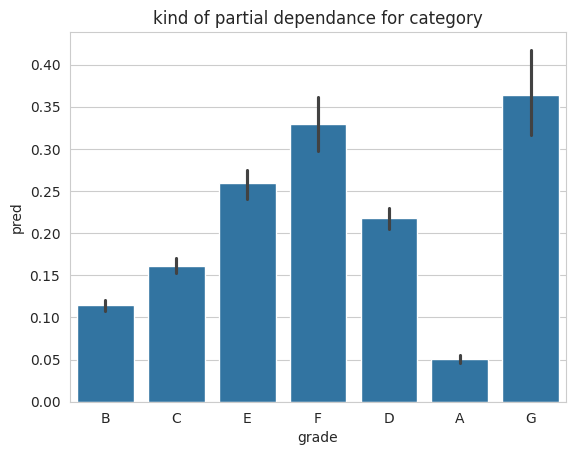

In [50]:
X_pd_nn=loan.drop('loan_status', axis=1)

X_s = loan[numeric_features + categorical_features]
y_s = mlp_pipeline.predict(X_pd_nn)
Z = pd.concat([X_s, pd.Series(y_s, name='pred')], axis=1)

sns.barplot(data=Z,x=categorical_features[0],y='pred')
plt.title("kind of partial dependance for category")
plt.show()


R^2 score on the training set: 0.1788
Coefficients:
loan_amnt: 0.0058
funded_amnt: 0.2061
funded_amnt_inv: -0.1013
installment: -0.0739
annual_inc: -0.0153
dti: -0.0001
delinq_2yrs: -0.0007
fico_range_low: -0.0009
fico_range_high: -0.0009
inq_last_6mths: 0.0253
mths_since_last_delinq: 0.0042
mths_since_last_record: -0.0011
open_acc: -0.0087
pub_rec: 0.0019
revol_bal: 0.0068
total_acc: 0.0072
out_prncp: -0.0180
out_prncp_inv: -0.0191
total_rec_late_fee: 0.0417
last_pymnt_amnt: -0.1133
delinq_amnt: -0.0011
pub_rec_bankruptcies: 0.0081
tax_liens: -0.0016
int_rate: 0.1070
emp_length: 0.0036
grade_A: 0.0912
grade_B: 0.0371
grade_C: -0.0002
grade_D: -0.0042
grade_E: -0.0369
grade_F: -0.0236
grade_G: -0.0465
grade_nan: -0.0170
sub_grade_A1: 0.0316
sub_grade_A2: 0.0355
sub_grade_A3: 0.0201
sub_grade_A4: -0.0030
sub_grade_A5: 0.0070
sub_grade_B1: 0.0218
sub_grade_B2: 0.0156
sub_grade_B3: 0.0039
sub_grade_B4: 0.0026
sub_grade_B5: -0.0068
sub_grade_C1: 0.0152
sub_grade_C2: -0.0037
sub_grade_C3: -

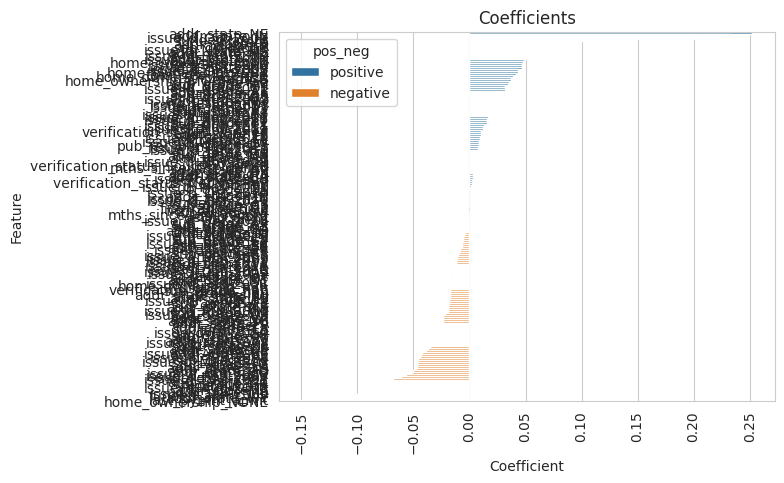

In [51]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

X = loan.drop('loan_status', axis=1)

# Split dataset into features and target variable
X_s = loan[numeric_features + categorical_features]
y_s = mlp_pipeline.predict(X)

# Splitting dataset into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Creating transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    (  'scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating the Linear Regression pipeline
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fitting the model
linear_regression_pipeline.fit(X_train_s, y_train_s)

# Calculate R^2 score on the training set
sur_pred = linear_regression_pipeline.predict(X_train_s)
r2_score_train = r2_score(y_train_s, sur_pred)
print(f"R^2 score on the training set: {r2_score_train:.4f}")

# Accessing and printing the model's coefficients
regressor = linear_regression_pipeline.named_steps['regressor']
feature_names_transformed = (numeric_features +
                             list(linear_regression_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))

print("Coefficients:")
for name, coef in zip(feature_names_transformed, regressor.coef_):
    print(f"{name}: {coef:.4f}")


nn_coefficients = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Coefficient': regressor.coef_
})

nn_coefficients['pos_neg'] = nn_coefficients['Coefficient'].apply(lambda x: 'positive' if x > 0 else 'negative')

nn_coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plotting the coefficients
sns.barplot(data=nn_coefficients, y='Feature', x='Coefficient', hue='pos_neg')
plt.xticks(rotation=90)
plt.title('Coefficients')
plt.show()

In [52]:
nn_feature_importances = nn_coefficients.sort_values(by='Coefficient', ascending=False)
nn_feature_importances

Feature  Coefficient   pos_neg
163        addr_state_NE     0.252317  positive
150        addr_state_IN     0.233159  positive
124     issue_d_Oct-2007     0.209131  positive
1            funded_amnt     0.206089  positive
23              int_rate     0.106964  positive
..                   ...          ...       ...
98      issue_d_Jan-2009    -0.084185  negative
2        funded_amnt_inv    -0.101342  negative
184        addr_state_WY    -0.109306  negative
19       last_pymnt_amnt    -0.113286  negative
70   home_ownership_NONE    -0.150071  negative

[188 rows x 3 columns]

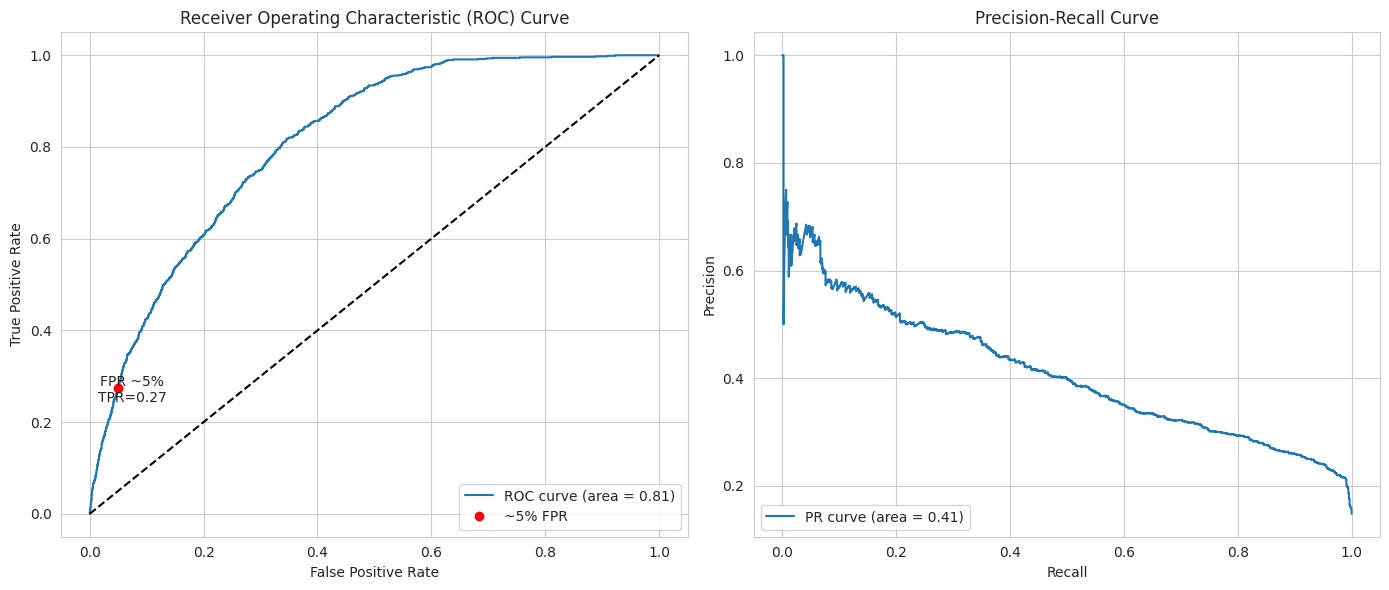

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_nn)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_nn)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

#Stacking Classifier

Fit the Pipeline

In [54]:
# base estimators for stacker
base_estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=10, random_state=42)),
    ('nn', MLPClassifier(random_state=42))
]

# final estimator on top
final_estimator = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

stack_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', stacking_classifier)])


In [55]:
stack_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_re...
                                                   'verification_status',
                                                   'issue_d', 'addr_state',
                                                   'term'])])),
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=0.2,
                                                                            n_estimators=200,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(min_samples_split=10,
                                                                        n_estimators=50,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

# Evaluate

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Predictions for the training set
y_train_pred = stack_pipeline.predict(X_train)
y_train_prob = stack_pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = stack_pipeline.predict(X_test)
y_test_prob = stack_pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")




Training Metrics:
Accuracy: 0.93
Precision (default): 0.86
Recall (default): 0.61
F1 Score (default): 0.72
AUC: 0.97

Test Metrics:
Accuracy: 0.88
Precision (default): 0.67
Recall (default): 0.39
F1 Score (default): 0.49
AUC: 0.90


## Permutation Importance


In [62]:
from sklearn.inspection import permutation_importance
result = permutation_importance(stack_pipeline, X_test, y_test,
                                n_repeats=10, random_state=42,
                                n_jobs=-1)


In [ ]:

def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    feature_names = []

    # Loop through each transformer within the ColumnTransformer
    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':  # Skip the 'remainder' transformer, if present
            continue
        if isinstance(transformer, Pipeline):
            # If the transformer is a pipeline, get the last transformer from the pipeline
            transformer = transformer.steps[-1][1]

        if hasattr(transformer, 'get_feature_names_out'):
            # If the transformer has 'get_feature_names_out', use it
            names = list(transformer.get_feature_names_out(columns))
        else:
            # Otherwise, just use the column names directly
            names = list(columns)

        feature_names.extend(names)

    return feature_names

transformed_feature_names = get_feature_names(preprocessor)
transformed_feature_names

In [ ]:
feature_names = numeric_features + categorical_features

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"Feature {feature_names[i]} "
              f"Mean Importance: {result.importances_mean[i]:.3f} "
              f"+/- {result.importances_std[i]:.3f}")


In [68]:
stack_feature_importances_df = pd.DataFrame({
  'Feature': feature_names,  # Or 'feature_names' if applicable
  'Importance Mean': result.importances_mean,
  'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False).reset_index(drop=True)
stack_feature_importances_df

Feature  Importance Mean  Importance Std
0          last_pymnt_amnt         0.068469        0.001830
1       total_rec_late_fee         0.014523        0.001481
2                     term         0.008512        0.001161
3                out_prncp         0.006699        0.000393
4                 int_rate         0.005373        0.001298
5              installment         0.004835        0.002042
6          funded_amnt_inv         0.003274        0.000740
7              funded_amnt         0.003089        0.001747
8               annual_inc         0.002518        0.001689
9                  issue_d         0.001662        0.001385
10          inq_last_6mths         0.000604        0.000693
11           out_prncp_inv         0.000554        0.000281
12              addr_state         0.000520        0.000902
13               total_acc         0.000084        0.000774
14             delinq_2yrs         0.000017        0.000191
15               tax_liens         0.000000        0.000000
16             delinq_amnt         0.000000        0.000000
17               loan_amnt        -0.000050        0.001425
18               revol_bal        -0.000084        0.001299
19               sub_grade        -0.000084        0.000634
20          home_ownership        -0.000134        0.000342
21                     dti        -0.000235        0.000377
22                   grade        -0.000369        0.000366
23     verification_status        -0.000386        0.000680
24              emp_length        -0.000604        0.000445
25                open_acc        -0.000638        0.000561
26    pub_rec_bankruptcies        -0.000856        0.000191
27  mths_since_last_delinq        -0.001007        0.000582
28  mths_since_last_record        -0.001007        0.000327
29          fico_range_low        -0.001142        0.000334
30         fico_range_high        -0.001175        0.000758
31                 pub_rec        -0.001209        0.000491

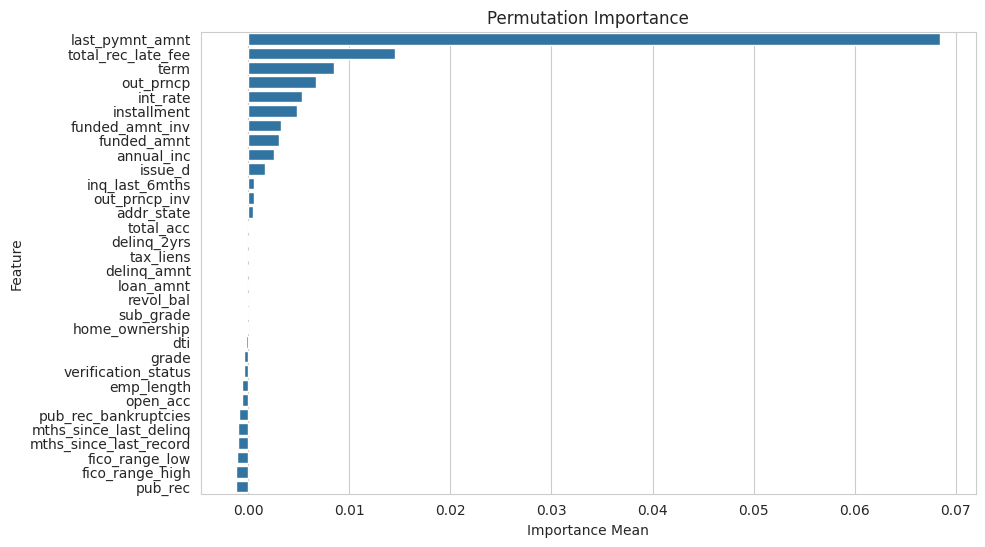

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(stack_feature_importances_df, x='Importance Mean', y='Feature')
plt.title('Permutation Importance')
plt.show()

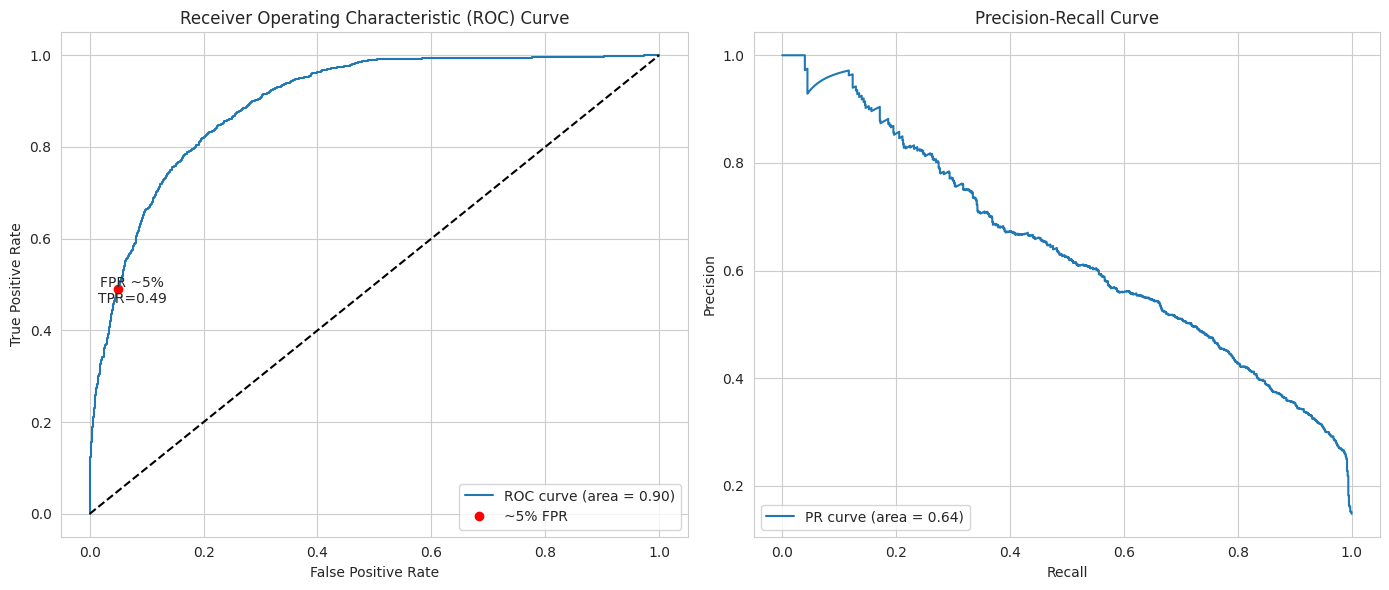

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


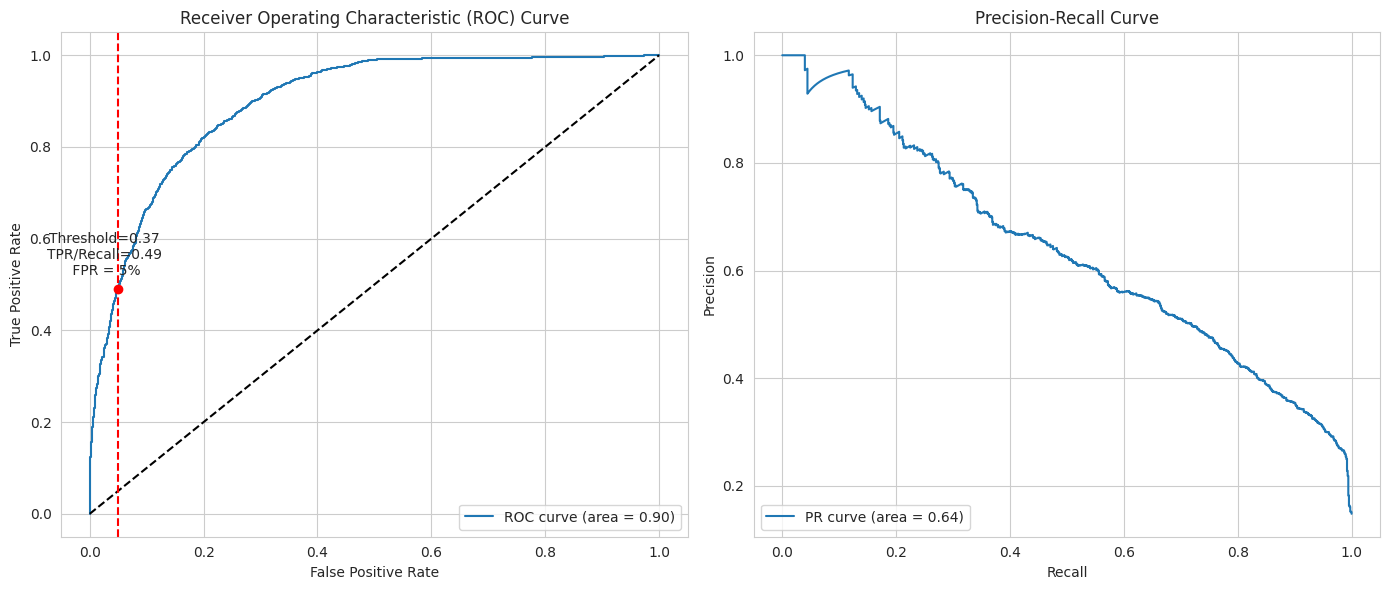

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Assuming calculations for fpr, tpr, and thresholds_roc are already done

plt.figure(figsize=(14, 6))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


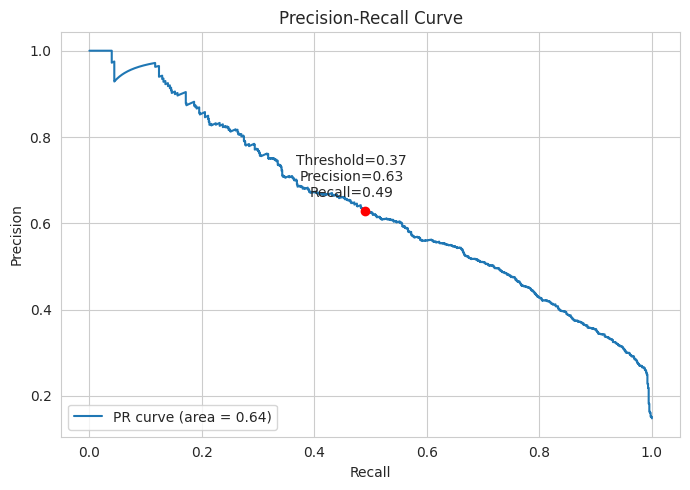

In [72]:
import numpy as np

# Find the closest threshold in the PR curve to the one identified in the ROC curve analysis
# This might not be exact due to the different metrics, but we find the nearest one
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]

plt.figure(figsize=(7, 5))

# Plot PR Curve
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Highlight the selected threshold
plt.plot(selected_recall, selected_precision, 'ro')  # Red dot at the selected threshold
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')

plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


#Feature Importance Plots for Optimized Models

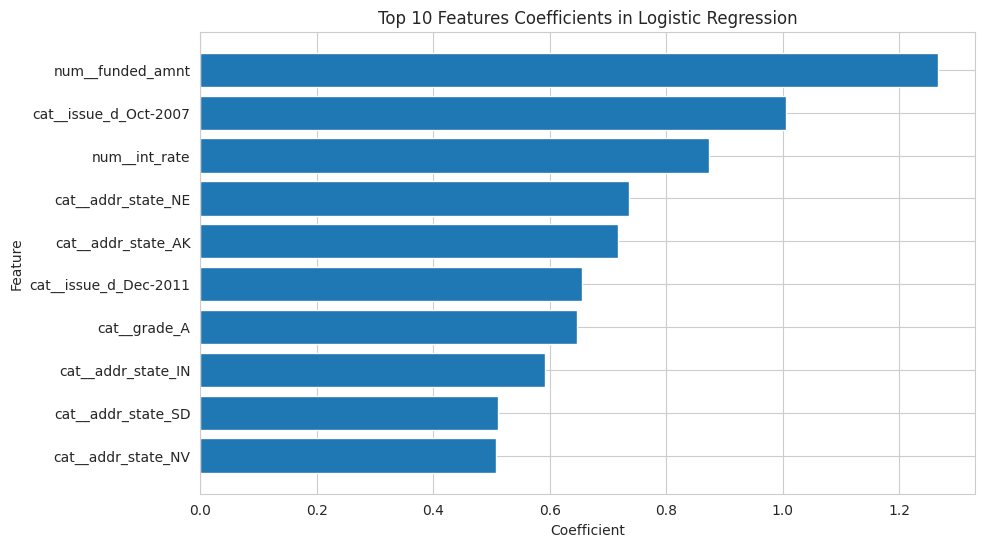

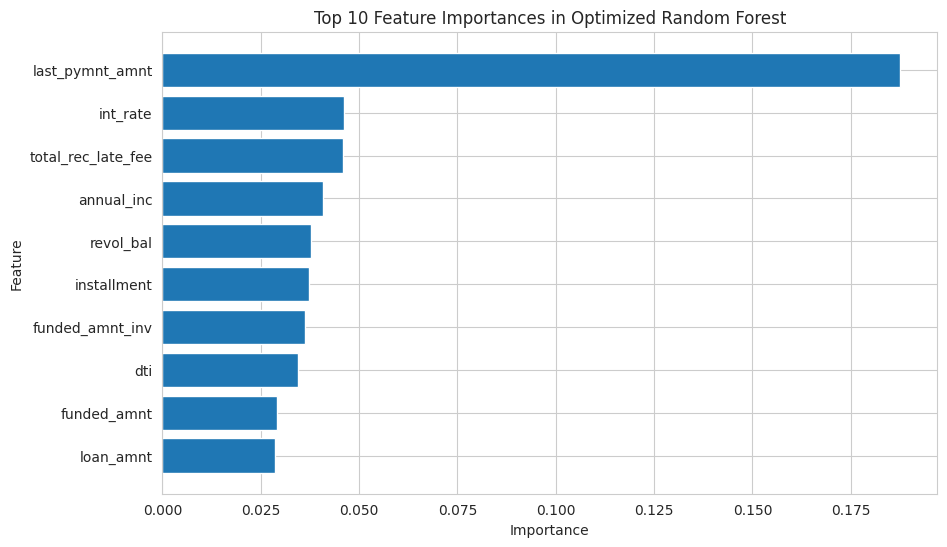

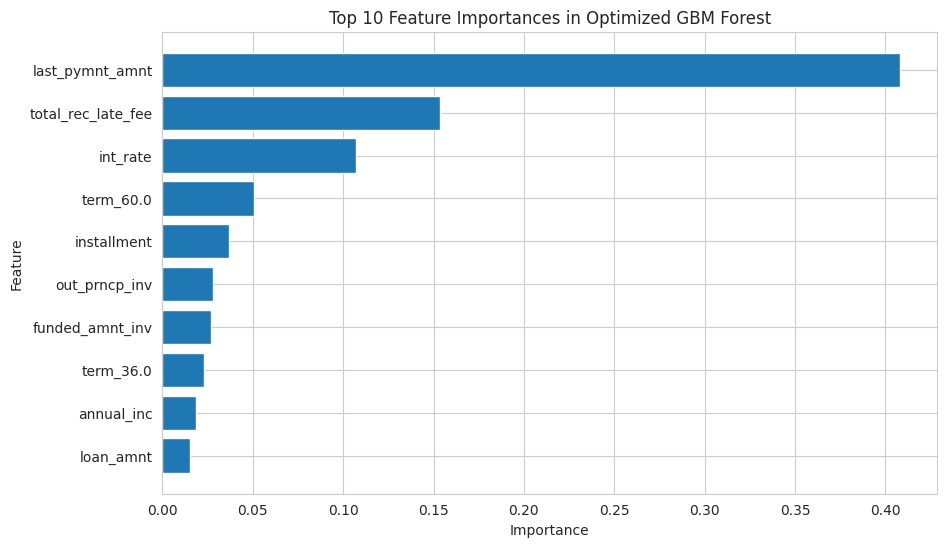

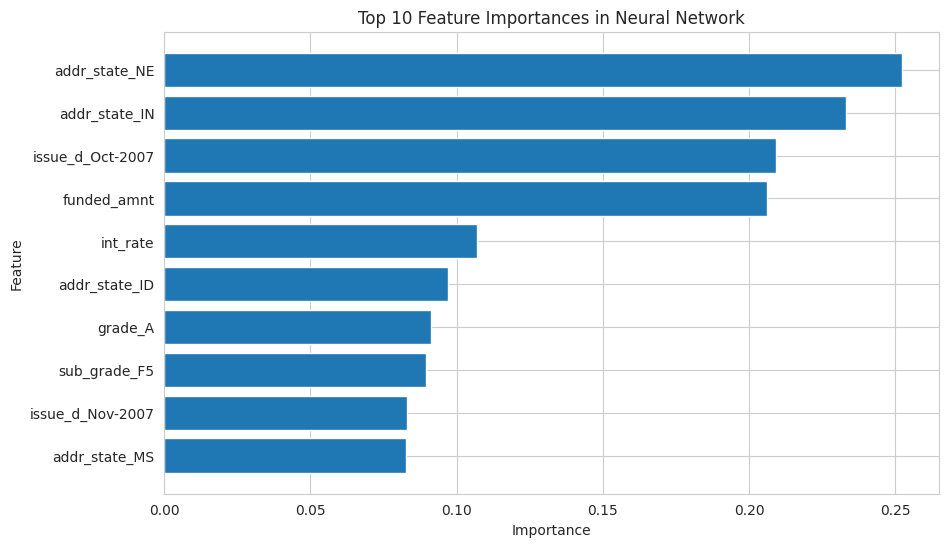

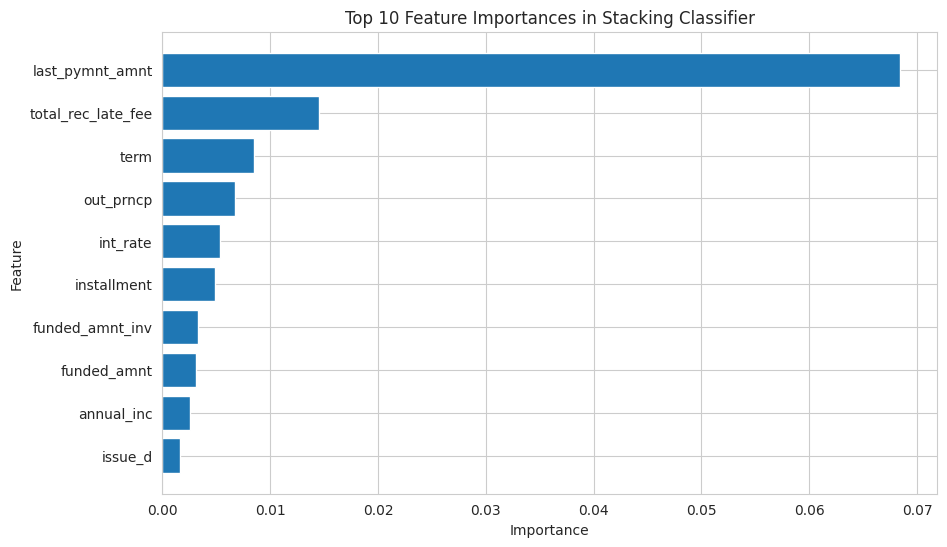

In [73]:
import matplotlib.pyplot as plt

# Plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Coefficients in Logistic Regression')
plt.barh(lr_feature_importance_df['Feature'][:10], lr_feature_importance_df['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Optimized Random Forest
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Optimized Random Forest')
plt.barh(rf_feature_importance_df['Feature'][:10], rf_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Optimized GBM
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Optimized GBM Forest')
plt.barh(gbm_feature_importance_df['Feature'][:10], gbm_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

#Plot for Neaural Network
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Neural Network')
plt.barh(nn_feature_importances['Feature'][:10], nn_feature_importances['Coefficient'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

#Plot for Stacking
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Stacking Classifier')
plt.barh(stack_feature_importances_df['Feature'][:10], stack_feature_importances_df['Importance Mean'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

#Model Curves for Optimized Models

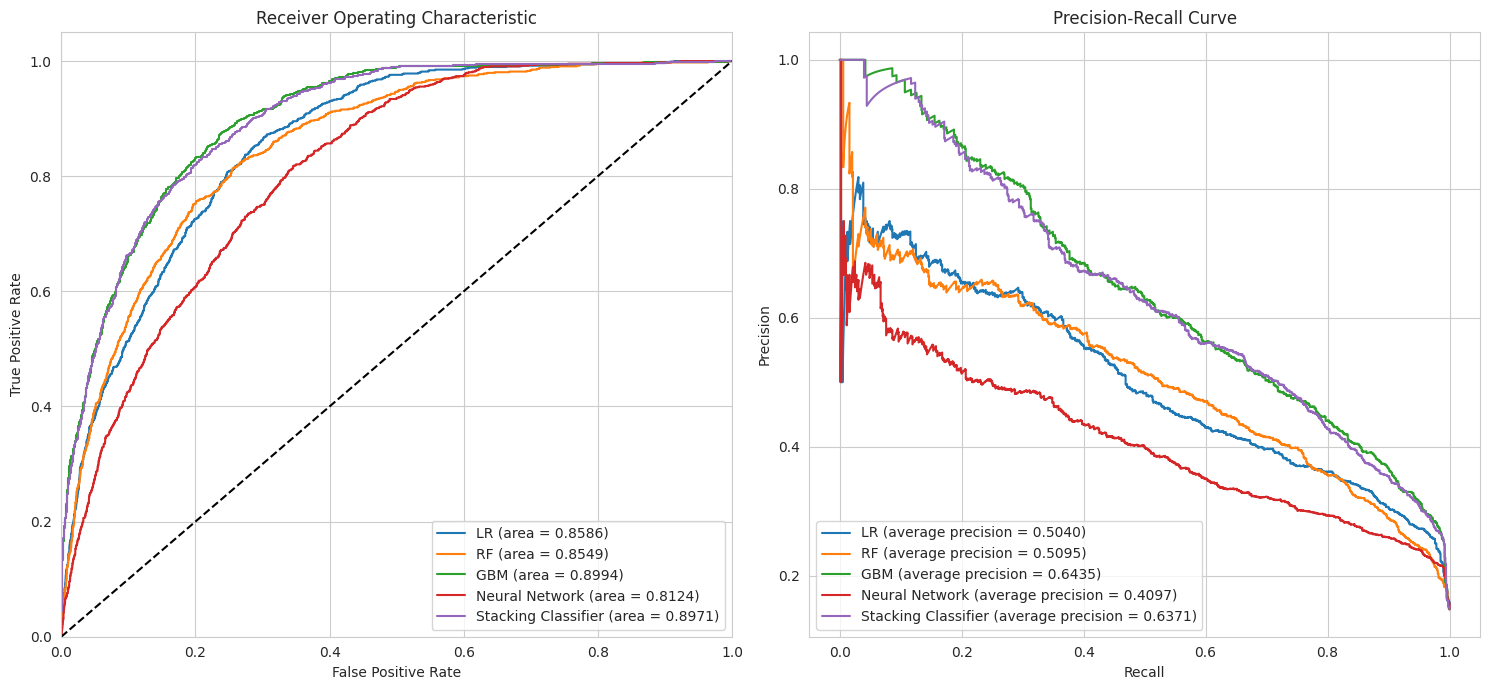

In [74]:
model_set = {
    "LR": lr_pipeline,
    "RF": rf_pipeline_hpo,
    "GBM": gbm_pipeline_hpo,
    "Neural Network": mlp_pipeline,
    "Stacking Classifier": stack_pipeline}


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split

def plot_model_curves(model_set, X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(loan[numeric_features + categorical_features], loan[target], test_size=0.2, random_state=42)

    plt.figure(figsize=(15, 7))

    # ROC Curve plot
    plt.subplot(1, 2, 1)
    for name, model in model_set.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Get predicted probabilities
        y_score = model.predict_proba(X_test)[:, 1]
        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        # Plot
        plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    # PR Curve plot
    plt.subplot(1, 2, 2)
    for name, model in model_set.items():
        # Get predicted probabilities
        y_score = model.predict_proba(X_test)[:, 1]
        # Compute PR curve and PR area
        precision, recall, _ = precision_recall_curve(y_test, y_score)
        average_precision = average_precision_score(y_test, y_score)
        # Plot
        plt.plot(recall, precision, label=f'{name} (average precision = {average_precision:.4f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

# Example usage:
model_set = {
    "LR": lr_pipeline,
    "RF": rf_pipeline_hpo,
    "GBM": gbm_pipeline_hpo,
    "Neural Network": mlp_pipeline,
    "Stacking Classifier": stack_pipeline}

#plot_model_curves(model_set, test[numeric_features], test['riskperformance_target'])

plot_model_curves(model_set, X_test, y_test)

#Which is Best Model?

In [75]:
#paste eval metrics of lr, optimized rf and gbm

print(f"Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"  AUC: {roc_auc_score(y_test, lr_predictions):.4f}")
print(f"  Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"  Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f"  F1: {f1_score(y_test, lr_predictions):.4f}")
print("\n -------- \n")
print("Random Forest Model Optimized:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_rf_hpo):.4f}")
print("\n -------- ")
print("GBM Optimized:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_gbm_hpo):.4f}")
print("\n -------- ")
print("Neural Network:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_nn):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_nn):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_nn):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_nn):.4f}")
print("\n -------- ")
print("Stacking Classifier:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"AUC: {test_auc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Logistic Regression:
Accuracy: 0.8709
  AUC: 0.6297
  Precision: 0.6421
  Recall: 0.2872
  F1: 0.3969

 -------- 

Random Forest Model Optimized:
  Accuracy: 0.8625
  AUC: 0.8549
  Precision: 0.6520
  Recall: 0.1510
  F1: 0.2452

 -------- 
GBM Optimized:
  Accuracy: 0.8840
  AUC: 0.8992
  Precision: 0.7083
  Recall: 0.3666
  F1: 0.4832

 -------- 
Neural Network:
  Accuracy: 0.8361
  AUC: 0.8124
  Precision: 0.4396
  Recall: 0.3927
  F1: 0.4149

 -------- 
Stacking Classifier:
Accuracy: 0.8818
AUC: 0.8971
Precision: 0.6732
Recall: 0.3905
F1 Score: 0.4943


#Best Model Partial Dependance Plot

In [76]:
# !pip install -U scikit-learn
numeric_features

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_late_fee',
 'last_pymnt_amnt',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'int_rate',
 'emp_length']

In [77]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_amnt', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'int_rate', 'emp_length', 'grade',
       'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'addr_state', 'term'],
      dtype='object')

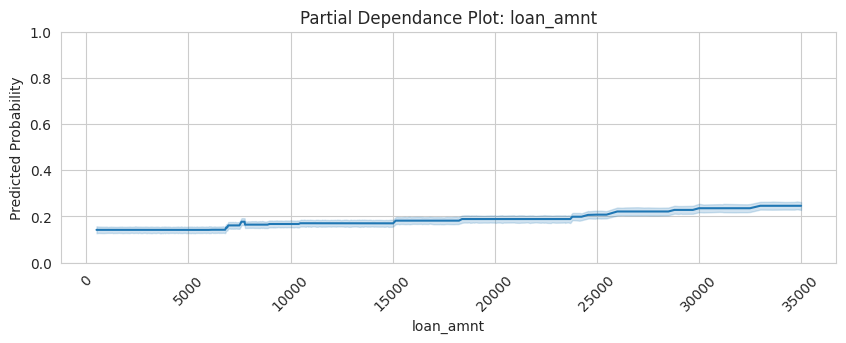

In [78]:
var = 'loan_amnt'
sample_n = 1000
pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.2).unique(),columns=[var])
pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

pdp_cross = pdp_sample.merge(pdp_values, how='cross')
pdp_cross['pred'] = gbm_pipeline_hpo.predict_proba(pdp_cross)[:,1]
plt.figure(figsize=(10, 3))
sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
plt.title(f"Partial Dependance Plot: {var}")
plt.ylabel('Predicted Probability')
plt.xticks(rotation=45)
plt.ylim(0.0, 1)
plt.grid(True)
plt.show()

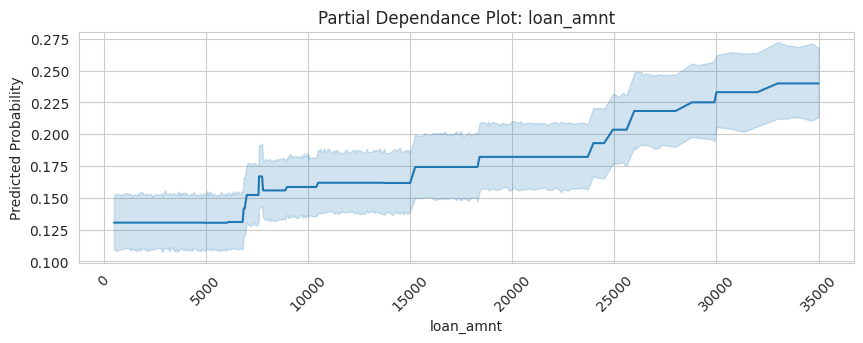

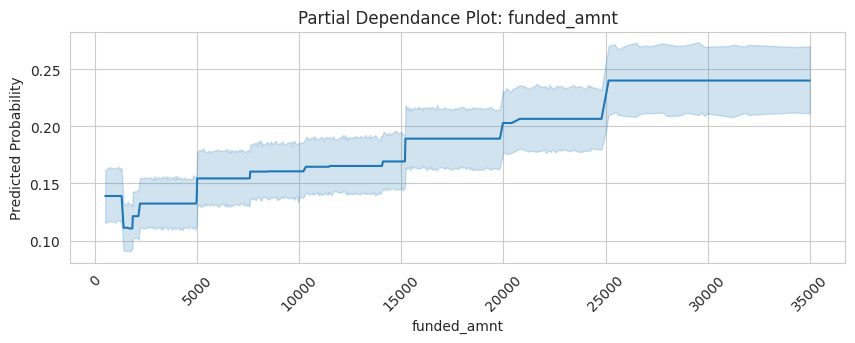

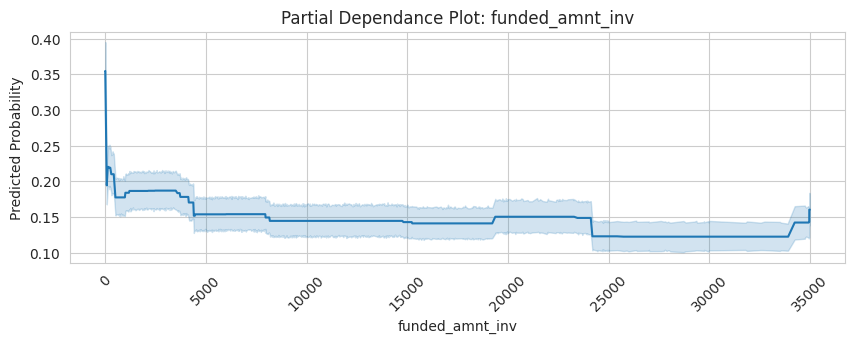

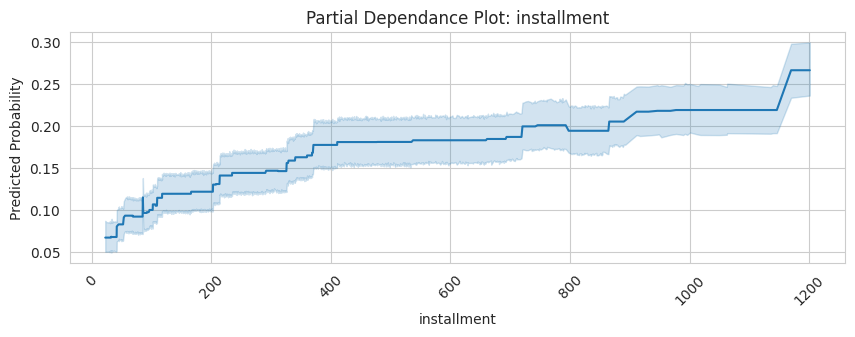

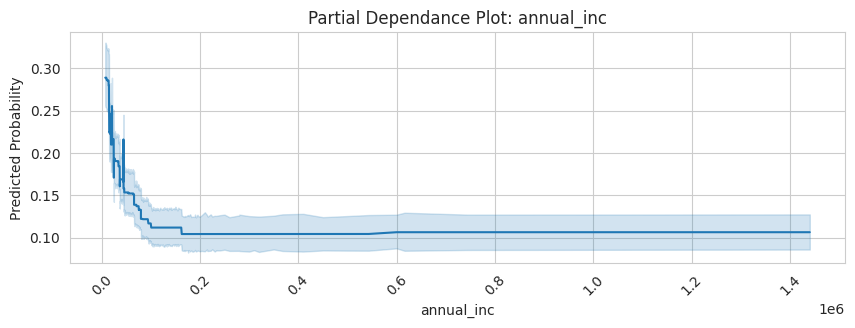

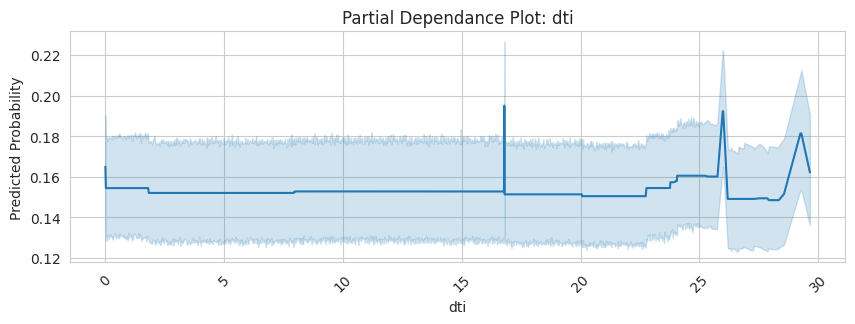

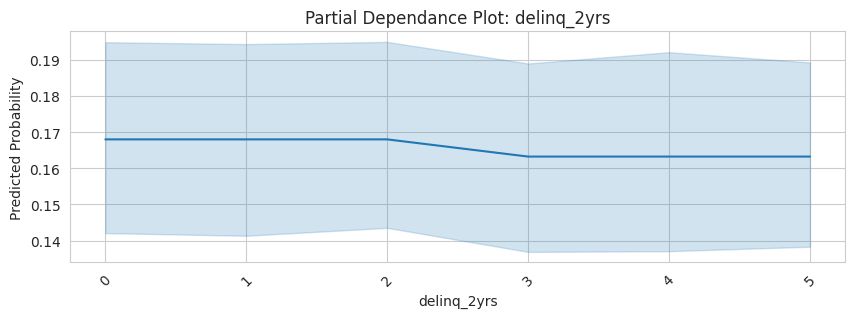

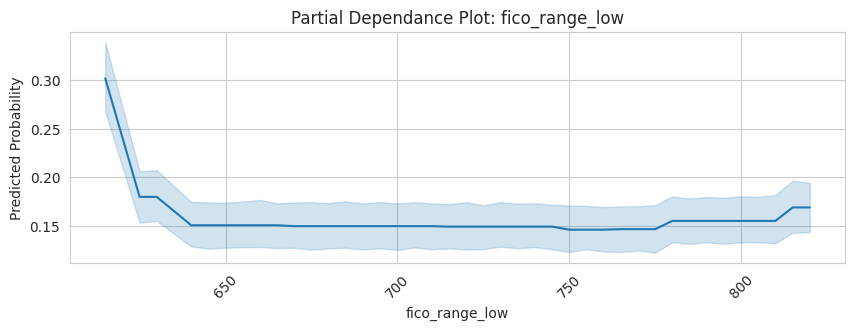

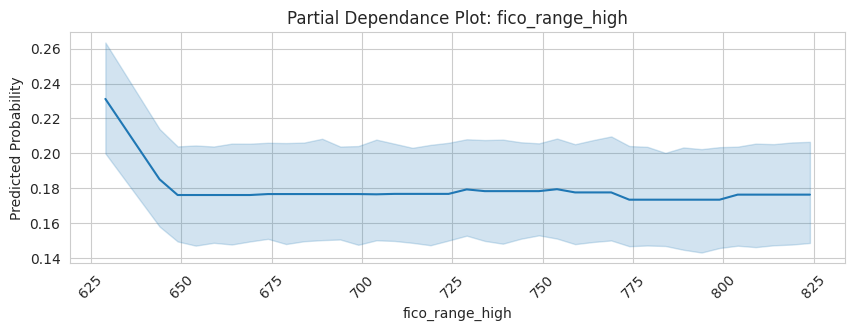

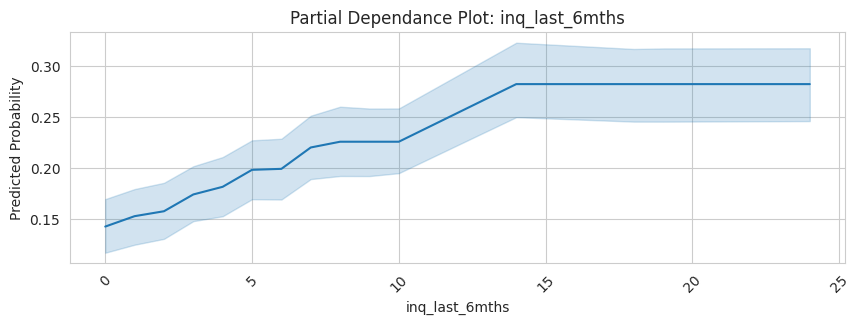

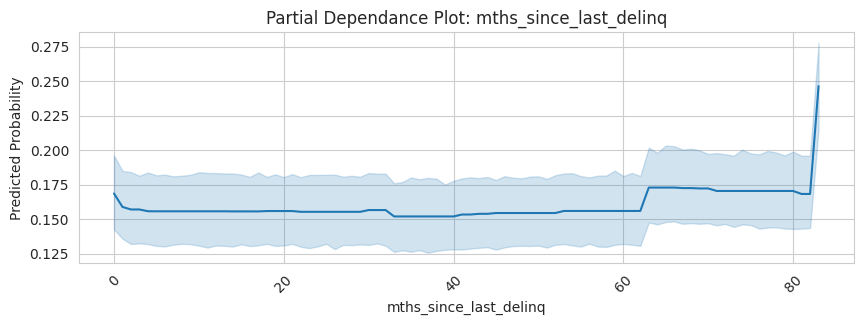

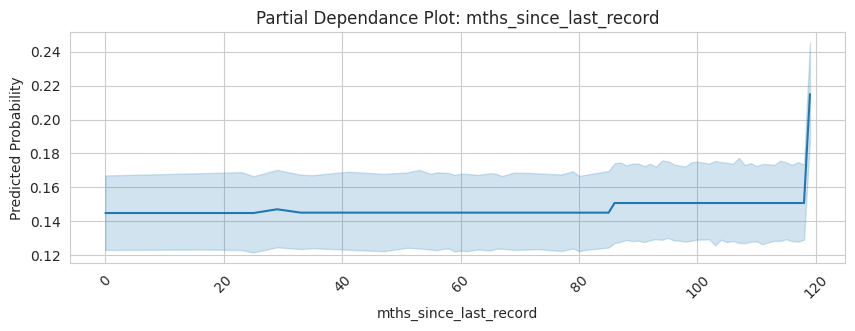

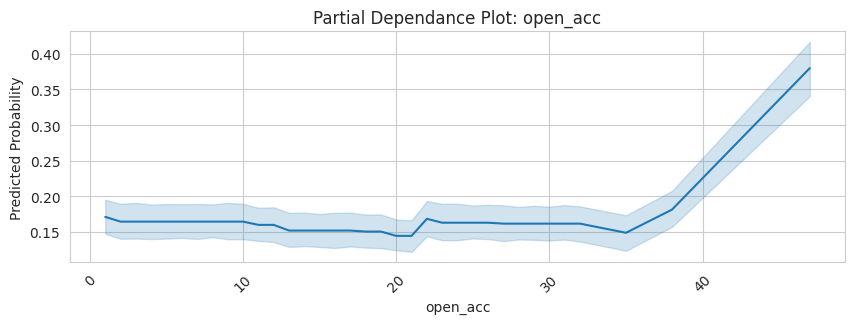

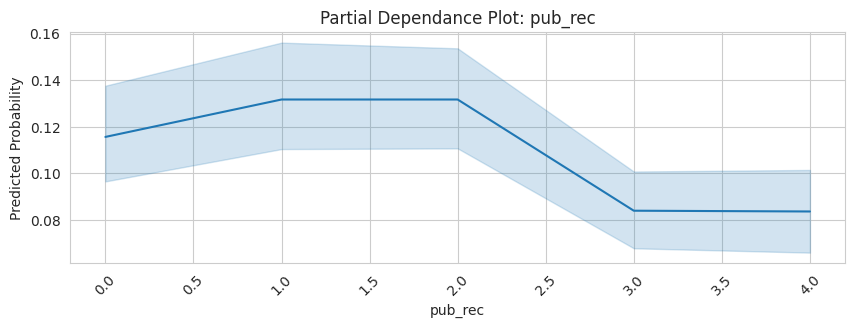

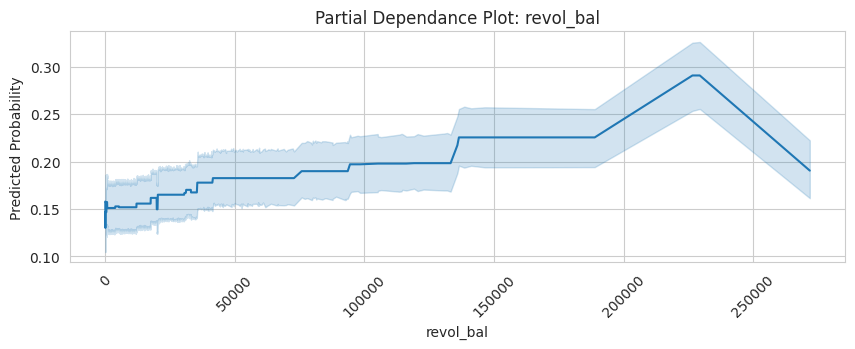

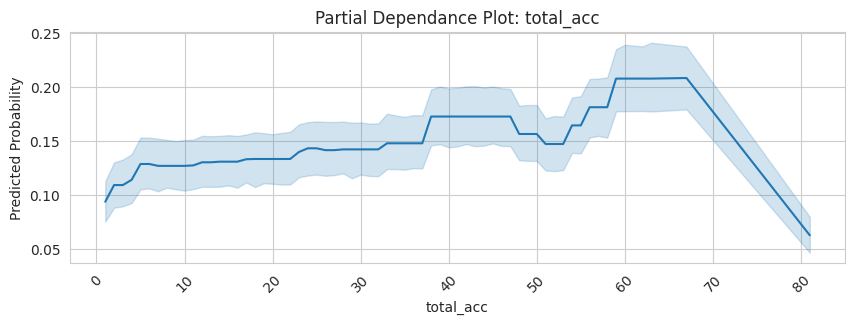

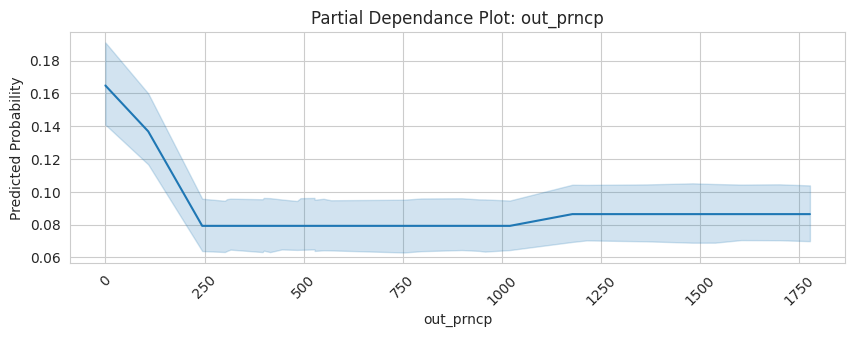

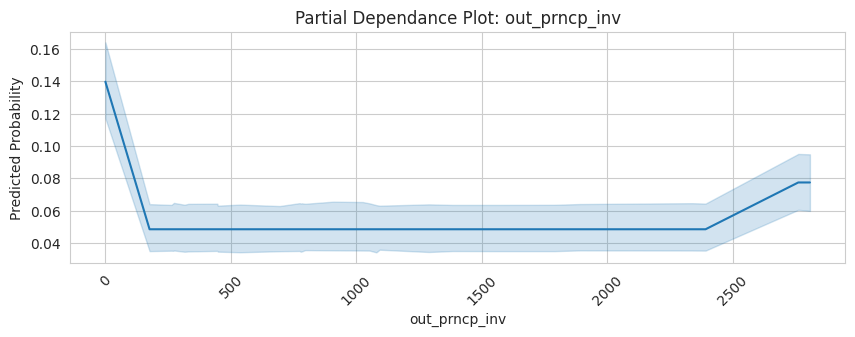

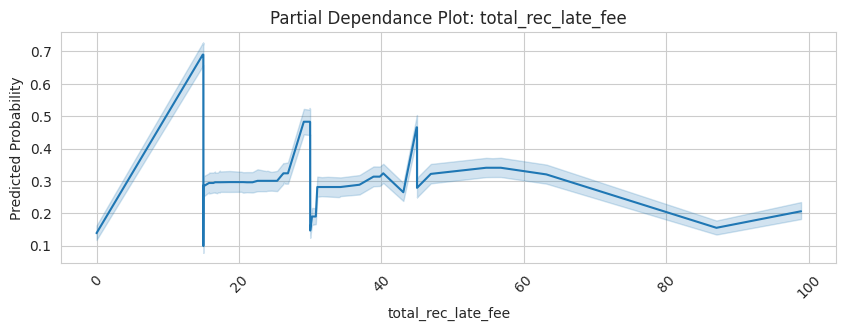

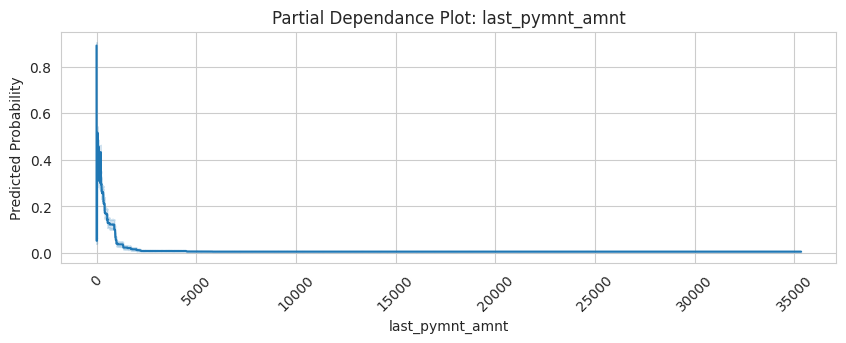

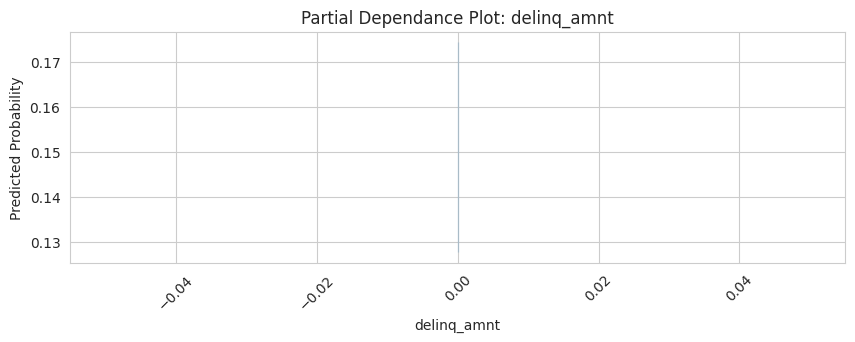

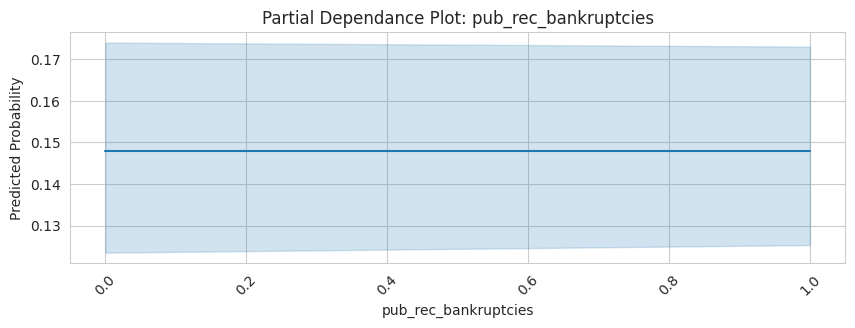

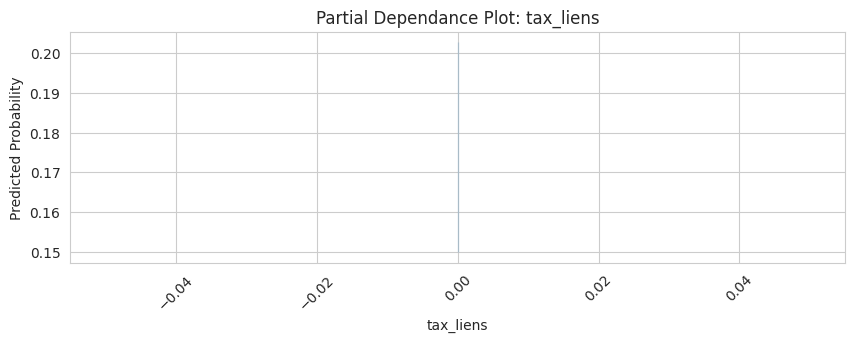

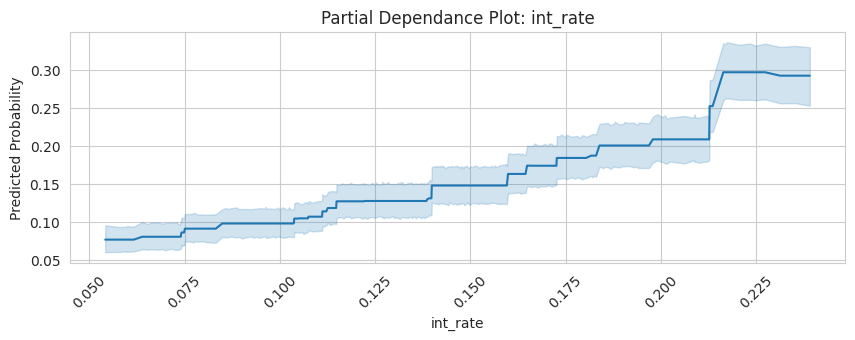

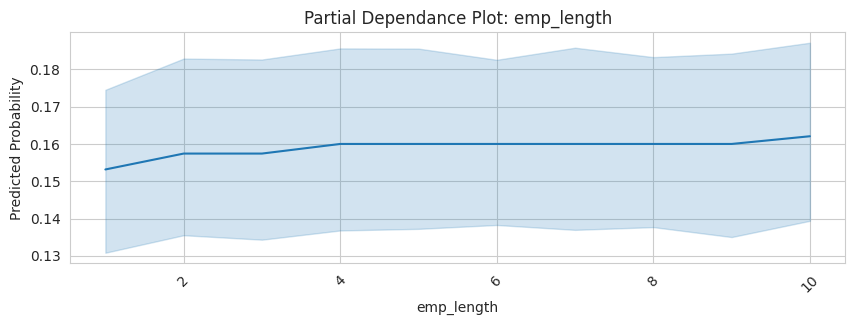

In [79]:

def pdp_plot_numeric(var, sample_n):
  # var = 'credit_amount'
  pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.1).unique(),columns=[var])
  pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = gbm_pipeline_hpo.predict_proba(pdp_cross)[:,1]
  plt.figure(figsize=(10, 3))
  sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()

# numeric_features = ['credit_amount', 'duration', 'age']
for var in numeric_features:
  pdp_plot_numeric(var, sample_n=300)

# PDP Categorical

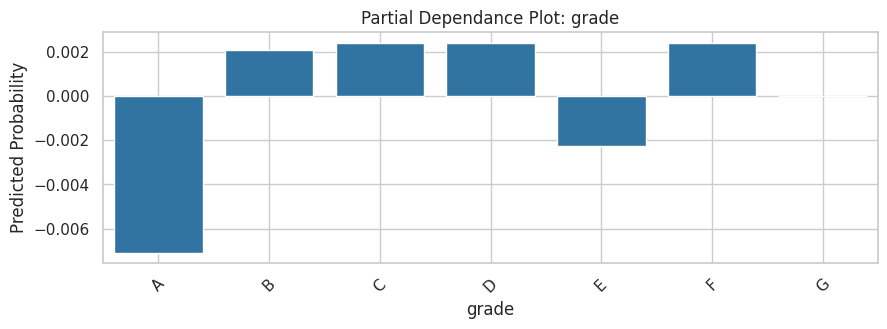

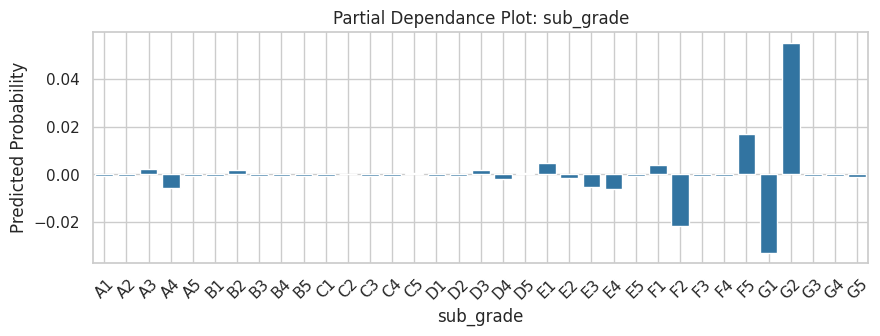

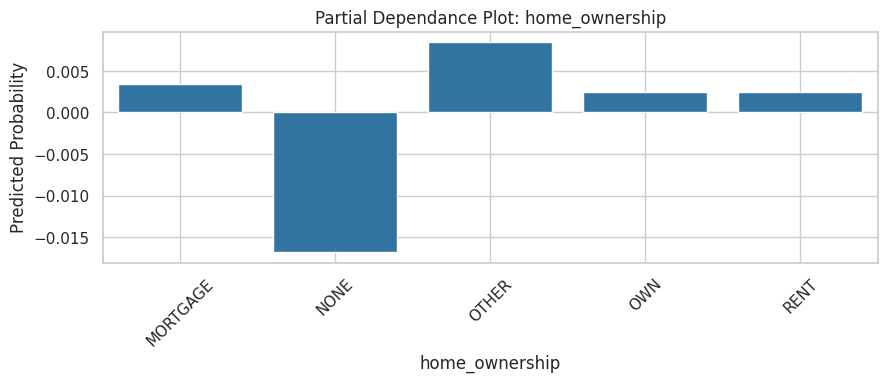

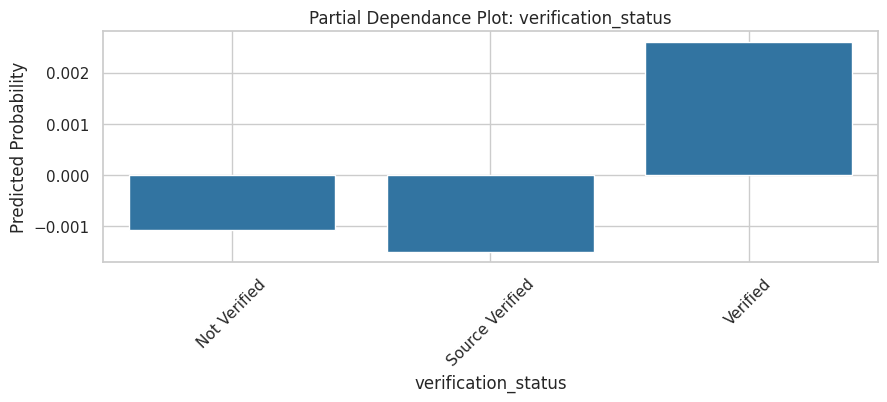

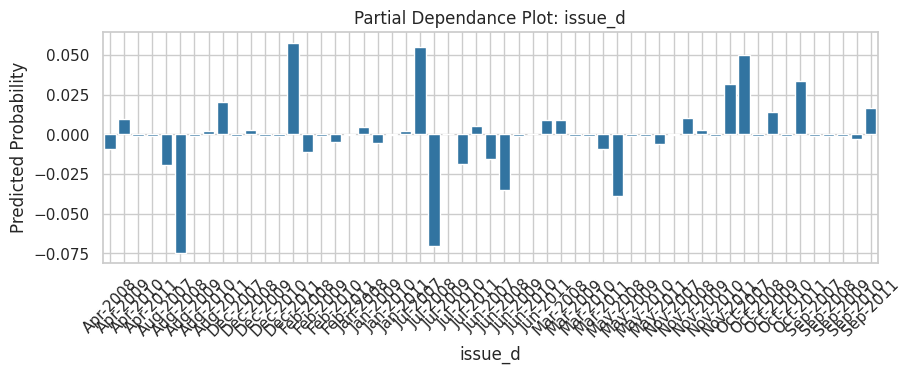

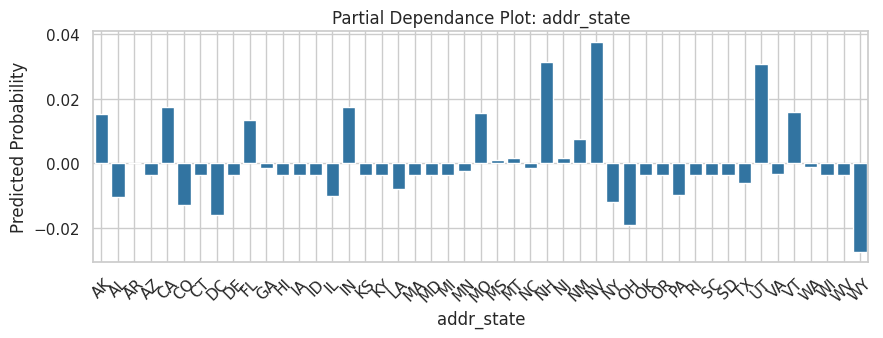

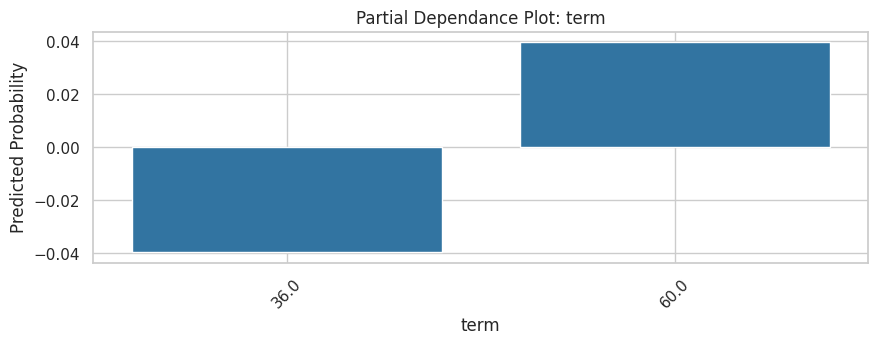

In [80]:
def pdp_plot_categorical(var, sample_n):
  sns.set_style("whitegrid")  # Try "darkgrid", "ticks", etc.
  sns.set_context("notebook")  # Try "paper", "notebook", "poster" for different sizes

  pdp_values = pd.DataFrame(X_test[var].sort_values().unique(),columns=[var])
  pdp_sample = X_test.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = gbm_pipeline_hpo.predict_proba(pdp_cross)[:,1]
  mean_pred = pdp_cross['pred'].mean()
  pdp_cross['pred'] = pdp_cross['pred'].apply(lambda x: x - mean_pred)
  plt.figure(figsize=(10, 3))
 #sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  sns.barplot(x=f"{var}", y='pred',
              ci=None,
              data=pdp_cross,
              estimator="mean")
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()


for var in categorical_features:
  pdp_plot_categorical(var, sample_n=100)

In [83]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042470 sha256=292a7e348d5a9bce7c5358c29aa1a17ecee27c2b578ee221c9178e37fa0855ad
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex


In [84]:
import dalex as dx # for explanations
pipeline_explainer = dx.Explainer(gbm_pipeline_hpo, X_test, y_test)
pipeline_explainer

Preparation of a new explainer is initiated

  -> data              : 5956 rows 32 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5956 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7cfb8b532b90> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000264, mean = 0.145, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.957, mean = 0.00328, max = 0.999
  -> model_info        : package sklearn

A new explainer has been created!


In [85]:
model_performance  = pipeline_explainer.model_performance("classification")
model_performance.result

recall  precision        f1  accuracy       auc
GradientBoostingClassifier  0.367764   0.710526  0.484667  0.884318  0.899434

# Variable Importance

In [86]:
# Calculate feature importance
fi = pipeline_explainer.model_parts(processes=4)

# Plot feature importance
fi.plot()

## PDP

In [87]:
# Let's say you want to create PDPs for a feature named 'feature_name'
pdp_numeric_profile = pipeline_explainer.model_profile(variables=numeric_features)

# Now, plot the PDP for 'feature_name'
pdp_numeric_profile.plot()

Calculating ceteris paribus: 100%|██████████| 25/25 [00:18<00:00,  1.36it/s]


In [88]:
pdp_categorical_profile = pipeline_explainer.model_profile(
    variable_type = 'categorical',
    variables=categorical_features)

# Now, plot the PDP for 'feature_name'
pdp_categorical_profile.plot()

Calculating ceteris paribus: 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]


# Local predictions

In [89]:
X_test['pred']= gbm_pipeline_hpo.predict(X_test)
X_test['pred_proba']= gbm_pipeline_hpo.predict_proba(X_test)[:,1]
X_test[target] = y_test
X_test.head()

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc  \
13494     4375.0       4375.0      4225.000000       131.95     17760.0   
21759    10000.0      10000.0      9475.000000       323.85     55000.0   
11247    24000.0      24000.0     22921.129991       560.56     53000.0   
25028     5550.0       5550.0      5550.000000       189.98     50000.0   
20440    10000.0      10000.0      9875.000000       232.58     45000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
13494  20.20          0.0           750.0            754.0             0.0   
21759  18.59          0.0           715.0            719.0             0.0   
11247  22.42          0.0           740.0            744.0             1.0   
25028  21.58          0.0           665.0            669.0             2.0   
20440   5.97          0.0           765.0            769.0             0.0   

       ...  grade  sub_grade  home_ownership  verification_status   issue_d  \
13494  ...      A         A1             OWN      Source Verified  Feb-2011   
21759  ...      B         B2            RENT         Not Verified  Apr-2010   
11247  ...      C         C5        MORTGAGE             Verified  May-2011   
25028  ...      D         D1        MORTGAGE         Not Verified  Jul-2009   
20440  ...      C         C3            RENT         Not Verified  Jun-2010   

       addr_state  term  pred  pred_proba  loan_status  
13494          AZ  36.0     0    0.193767            0  
21759          NY  36.0     0    0.007912            0  
11247          WV  60.0     0    0.007151            0  
25028          CA  36.0     0    0.358333            0  
20440          CA  60.0     0    0.356878            1  

[5 rows x 35 columns]

In [90]:
X_test['loan_status'].head()

13494    0
21759    0
11247    0
25028    0
20440    1
Name: loan_status, dtype: int64

#True Positives

In [91]:
top_10_tp = (X_test
             .query('loan_status == 1 and pred == 1')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
)
top_10_tp

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0    30000.0      30000.0      7100.000000       778.72     51600.0  19.09   
1    18000.0      18000.0     12450.000005       494.49     36000.0  11.27   
2    10400.0      10400.0     10375.000000       261.73     85325.0   8.93   
3     7200.0       7200.0      1849.993412       247.41     53000.0  15.65   
4    25000.0       7850.0      3799.999312       265.41    200000.0  15.62   
5     4000.0       4000.0      3975.000000        97.17     26400.0   3.77   
6     5000.0       5000.0       500.009430       163.49    264000.0   8.30   
7     7000.0       7000.0      6975.000000       180.32     27000.0   4.62   
8     2200.0       2200.0      2200.000000        70.90     26004.0  14.95   
9    20000.0      20000.0     19050.000000       716.95     62000.0  13.51   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  ...  grade  \
0          0.0           705.0            709.0             3.0  ...      E   
1          0.0           660.0            664.0             2.0  ...      F   
2          0.0           725.0            729.0             0.0  ...      D   
3          0.0           645.0            649.0            20.0  ...      E   
4          0.0           705.0            709.0             3.0  ...      D   
5          1.0           685.0            689.0             0.0  ...      D   
6          0.0           675.0            679.0            25.0  ...      C   
7          0.0           680.0            684.0             1.0  ...      F   
8          0.0           725.0            729.0             0.0  ...      B   
9          1.0           695.0            699.0             3.0  ...      E   

   sub_grade  home_ownership  verification_status   issue_d  addr_state  term  \
0         E2        MORTGAGE             Verified  Oct-2011          TX  60.0   
1         F5            RENT             Verified  Jul-2011          NY  60.0   
2         D4            RENT             Verified  Sep-2011          CA  60.0   
3         E4        MORTGAGE         Not Verified  Dec-2007          IN  36.0   
4         D3        MORTGAGE         Not Verified  Apr-2008          CA  36.0   
5         D4            RENT      Source Verified  Oct-2010          CA  60.0   
6         C3        MORTGAGE         Not Verified  Dec-2007          GA  36.0   
7         F2            RENT      Source Verified  Jun-2010          DE  60.0   
8         B1            RENT             Verified  Dec-2011          PA  36.0   
9         E4            RENT             Verified  Sep-2009          CA  36.0   

   pred  pred_proba  loan_status  
0     1    0.999281            1  
1     1    0.996127            1  
2     1    0.993729            1  
3     1    0.990572            1  
4     1    0.990100            1  
5     1    0.988388            1  
6     1    0.986923            1  
7     1    0.986845            1  
8     1    0.986633            1  
9     1    0.985241            1  

[10 rows x 35 columns]

# Shap Explainations TP

In [92]:
for index, row in top_10_tp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_tp.iloc[index],
      type='shap',
      B=5,
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

# Break Down Interactions TP

In [93]:
for index, row in top_10_tp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_tp.iloc[index],
      type='break_down_interactions',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()


# False Positives

In [94]:
top_10_fp = (X_test
             .query('loan_status == 0 and pred == 1')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
)
top_10_fp

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0     2500.0       2500.0       400.000000        83.63     95000.0  16.19   
1    12000.0      12000.0     11574.101802       291.76     56000.0  12.00   
2     7500.0       7500.0         0.000000       259.33     70000.0  25.68   
3    20000.0      20000.0     19912.901304       539.39     60000.0   6.44   
4    25000.0      22450.0     18925.000000       807.80    170000.0  26.97   
5     6000.0       6000.0      6000.000000       148.77     28800.0   9.04   
6    35000.0      35000.0     35000.000000      1269.73     96000.0  14.42   
7    15000.0      15000.0       450.000000       498.51    100000.0  15.82   
8    26375.0      26375.0     26375.000000       622.63     78000.0  16.54   
9    16050.0      16050.0     16025.000000       573.35     45000.0  15.15   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  ...  grade  \
0          0.0           655.0            659.0             5.0  ...      D   
1          0.0           695.0            699.0             1.0  ...      D   
2          0.0           690.0            694.0             0.0  ...      E   
3          1.0           675.0            679.0             0.0  ...      G   
4          0.0           680.0            684.0             0.0  ...      G   
5          0.0           680.0            684.0             2.0  ...      D   
6          0.0           675.0            679.0             1.0  ...      D   
7          2.0           680.0            684.0             1.0  ...      C   
8          0.0           730.0            734.0             3.0  ...      C   
9          0.0           665.0            669.0             1.0  ...      E   

   sub_grade  home_ownership  verification_status   issue_d  addr_state  term  \
0         D3        MORTGAGE         Not Verified  Jan-2008          FL  36.0   
1         D2        MORTGAGE      Source Verified  Aug-2011          CT  60.0   
2         E3        MORTGAGE             Verified  Apr-2008          CA  36.0   
3         G3        MORTGAGE      Source Verified  Mar-2011          TX  60.0   
4         G2        MORTGAGE             Verified  Apr-2008          NY  36.0   
5         D4            RENT             Verified  May-2011          NY  60.0   
6         D5        MORTGAGE             Verified  Nov-2011          CA  36.0   
7         C5        MORTGAGE         Not Verified  Jan-2008          MI  36.0   
8         C3        MORTGAGE             Verified  Oct-2011          NJ  60.0   
9         E3            RENT             Verified  Feb-2011          IL  36.0   

   pred  pred_proba  loan_status  
0     1    0.956911            0  
1     1    0.902375            0  
2     1    0.889694            0  
3     1    0.871092            0  
4     1    0.870728            0  
5     1    0.853801            0  
6     1    0.839180            0  
7     1    0.828965            0  
8     1    0.825896            0  
9     1    0.824841            0  

[10 rows x 35 columns]

# Shap Explainations FP

In [95]:
for index, row in top_10_fp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fp.iloc[index],
      type='shap',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

# Break Down Interactions FP

In [96]:
for index, row in top_10_fp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fp.iloc[index],
      type='break_down_interactions',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()


# False Negatives
---

In [100]:
top_10_fn = (X_test
             .query('loan_status == 0 and pred == 1')
             .sort_values(by='pred_proba', ascending=True)
             .head(10)
             .reset_index(drop=True)
)
top_10_fn

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0     1200.0       1200.0      1200.000000        42.19     57000.0  12.57   
1     9725.0       9725.0      9725.000000       244.27     70000.0   1.29   
2    25975.0      16775.0     16500.000000       385.91     52000.0  25.62   
3    16500.0      16500.0     16325.000000       538.24     40428.0  17.36   
4    29700.0      19775.0     19650.000000       530.77    125000.0  17.23   
5    16000.0      16000.0     11093.977267       528.22     67600.0   2.20   
6    11500.0      11500.0     11500.000000       384.28     38500.0  13.06   
7    20000.0      20000.0     19925.000000       544.11    126000.0   9.39   
8    10000.0      10000.0      9221.938953       247.56     39996.0   5.79   
9    17175.0      17175.0     17150.000000       438.48     48000.0  10.75   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  ...  grade  \
0          1.0           660.0            664.0             1.0  ...      D   
1          0.0           685.0            689.0             1.0  ...      D   
2          0.0           730.0            734.0             0.0  ...      C   
3          0.0           725.0            729.0             1.0  ...      B   
4          0.0           675.0            679.0             2.0  ...      F   
5          0.0           730.0            734.0             1.0  ...      B   
6          0.0           690.0            694.0             0.0  ...      B   
7          0.0           665.0            669.0             1.0  ...      G   
8          0.0           680.0            684.0             1.0  ...      E   
9          0.0           710.0            714.0             0.0  ...      D   

   sub_grade  home_ownership  verification_status   issue_d  addr_state  term  \
0         D2            RENT             Verified  Jun-2011          NC  36.0   
1         D5        MORTGAGE         Not Verified  Jul-2011          OH  60.0   
2         C2        MORTGAGE             Verified  May-2011          FL  60.0   
3         B2            RENT             Verified  Sep-2010          NY  36.0   
4         F2        MORTGAGE             Verified  Aug-2011          NY  60.0   
5         B3            RENT      Source Verified  Jun-2009          CA  36.0   
6         B4            RENT      Source Verified  Dec-2011          DC  36.0   
7         G4        MORTGAGE             Verified  Oct-2010          GA  60.0   
8         E2            RENT         Not Verified  May-2010          NJ  60.0   
9         D5        MORTGAGE      Source Verified  Nov-2011          VA  60.0   

   pred  pred_proba  loan_status  
0     1    0.500282            0  
1     1    0.500778            0  
2     1    0.502759            0  
3     1    0.503188            0  
4     1    0.505970            0  
5     1    0.506890            0  
6     1    0.510591            0  
7     1    0.510948            0  
8     1    0.513474            0  
9     1    0.513529            0  

[10 rows x 35 columns]

#Shap FN


In [101]:
for index, row in top_10_fn.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fn.iloc[index],
      type='shap',
      B=5,
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

# Break Down Interactions FN

In [102]:
for index, row in top_10_fn.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fn.iloc[index],
      type='break_down_interactions',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()


#Apply best model to holdout set

In [103]:
# Load the dataset
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 3- Predict Loan Default/loan_holdout.csv')

# Display the first few rows of the dataframe
df2.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  1077175    1313524       2400         2400           2400.0  36 months   
1  1075358    1311748       3000         3000           3000.0  60 months   
2  1075269    1311441       5000         5000           5000.0  36 months   
3  1071570    1306721       5375         5375           5350.0  60 months   
4  1064687    1298717       9000         9000           9000.0  36 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   15.96%        84.33     C        C5  ...          NaN           Sep-2016   
1   12.69%        67.79     B        B5  ...     Oct-2016           Sep-2016   
2    7.90%       156.46     A        A4  ...          NaN           Jan-2016   
3   12.69%       121.45     B        B5  ...          NaN           Sep-2016   
4   13.49%       305.38     C        C1  ...          NaN           Sep-2016   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL            0.0   
1                        0.0            1       INDIVIDUAL            0.0   
2                        0.0            1       INDIVIDUAL            0.0   
3                        0.0            1       INDIVIDUAL            0.0   
4                        0.0            1       INDIVIDUAL            0.0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0         0.0                  0.0       0.0  
1                      0.0         0.0                  0.0       0.0  
2                      0.0         0.0                  0.0       0.0  
3                      0.0         0.0                  0.0       0.0  
4                      0.0         0.0                  0.0       0.0  

[5 rows x 51 columns]

In [104]:
target='loan_status'

#Clean

Missing Values

In [105]:
df2.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                       807
emp_length                      353
home_ownership                    0
annual_inc                        3
verification_status               0
issue_d                           0
pymnt_plan                        0
url                               0
desc                           4089
purpose                           0
title                             2
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       9
earliest_cr_line                  9
fico_range_low                    0
fico_range_high             

Change Term to float

In [106]:
df2['term']=df2['term'].str.replace('months','').astype('float')
df2['term']=df2['term'].fillna(df2['term'].median())
df2['term']

0        36.0
1        60.0
2        36.0
3        60.0
4        36.0
         ... 
12756    36.0
12757    36.0
12758    36.0
12759    36.0
12760    36.0
Name: term, Length: 12761, dtype: float64

Change interest rate to float

In [107]:
df2['int_rate']=df2['int_rate'].str.replace('%','').astype('float')
df2['int_rate']=df2['int_rate'].fillna(loan['int_rate'].median())
df2['int_rate']=df2['int_rate']/100
df2['int_rate']

0        0.1596
1        0.1269
2        0.0790
3        0.1269
4        0.1349
          ...  
12756    0.1059
12757    0.0901
12758    0.0743
12759    0.0933
12760    0.0775
Name: int_rate, Length: 12761, dtype: float64

Change Employment Length to int

In [108]:
df2['emp_length']=df2['emp_length'].str.replace('years','').str.replace('year','').str.replace('<','').str.replace('+','').astype('float')
df2['emp_length']=df2['emp_length'].fillna(df2['emp_length'].median())
df2['emp_length']

0        10.0
1         1.0
2         3.0
3         1.0
4         1.0
         ... 
12756     1.0
12757     1.0
12758     1.0
12759     1.0
12760    10.0
Name: emp_length, Length: 12761, dtype: float64

Change revol_util to float

In [109]:
df2['revol_util']=df2['revol_util'].str.replace('%','').astype('float')
df2['revol_util']=df2['revol_util'].fillna(loan['revol_util'].median())
df2['revol_util']=df2['revol_util']/100
df2['revol_util']

0        0.98500
1        0.53900
2        0.28300
3        0.36500
4        0.91700
          ...   
12756    0.66000
12757    0.00495
12758    0.00495
12759    0.00495
12760    0.00495
Name: revol_util, Length: 12761, dtype: float64

Change issue_d to date

In [110]:
#loan['issue_d'] = pd.to_datetime(loan['issue_d'], format="%b-%Y")
#loan['issue_d']

Change address state to object

In [111]:
df2['addr_state']=df2['addr_state'].fillna('missing')
df2['addr_state']

0        IL
1        OR
2        AZ
3        TX
4        VA
         ..
12756    CT
12757    TX
12758    NJ
12759    MA
12760    CT
Name: addr_state, Length: 12761, dtype: object

In [112]:
pred = gbm_pipeline_hpo.predict_proba(df2)[:,1]

In [113]:
holdout_submission = df2[['id']].copy()
holdout_submission['P_DEFAULT'] = pred
holdout_submission

id  P_DEFAULT
0      1077175   0.050466
1      1075358   0.010733
2      1075269   0.260298
3      1071570   0.820294
4      1064687   0.294036
...        ...        ...
12756    88637   0.186558
12757    85961   0.165380
12758    83979   0.022515
12759    77757   0.594279
12760    70686   0.450634

[12761 rows x 2 columns]

In [116]:
holdout_submission.to_csv('Final_holdout_submission.csv', index=False)

#To HTML

In [117]:
#Convert to HTML
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 3- Predict Loan Default/Baldis_Nik_Final_Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 3- Predict Loan Default/Baldis_Nik_Final_Project.ipynb to html
[NbConvertApp] Writing 6859927 bytes to /content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 3- Predict Loan Default/Baldis_Nik_Final_Project.html
